In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
from astropy import constants, units
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/'

In [3]:
plt.style.use('/Users/thepoetoftwilight/Documents/Astro/Code/science.mplstyle')

# Summary plots

In [4]:
def plot_str(ax, s_x, s_y, dx_lim, dy_lim, m, c, mfc, a, c_dx, c_dy):
    
    '''
    Function to plot string
    
    ax: axis
    s_x, s_y: string for x, y
    dx_lim, dy_lim: arrow width for upper limit in x, y
    m: marker type
    c: marker color
    mfc: marker face color (can be empty)
    a: transparency
    c_dx, c_dy: scaling for bar connecting spear to marker (for upper limits)
    '''
    
    x_uplim = s_x[0]=='<'
    y_uplim = s_y[0]=='<'
    
    x_lolim = s_x[0]=='>'
    y_lolim = s_y[0]=='>'
    
    # Handle x
    # Limits
    if x_uplim or x_lolim:
        x = float(s_x[1:])
        dx = dx_lim
    # Detection
    else:
        s_x_split = s_x.split(',')
        x = float(s_x_split[0])
        dx_lo = -float(s_x_split[1]) # Take care of the negative sign
        dx_hi = float(s_x_split[2])
        
    # Handle y
    if y_uplim or y_lolim:
        y = float(s_y[1:])
        dy = dy_lim
    # Detection
    else:
        s_y_split = s_y.split(',')
        y = float(s_y_split[0])
        dy_lo = -float(s_y_split[1]) # Take care of the negative sign
        dy_hi = float(s_y_split[2])
        
    # Plot
    # x uplim
    if x_uplim:
        
        # y uplim
        if y_uplim:
            # Make marker and spears
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=dy, marker=m, xuplims=True, uplims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)      
            caps[0].set_fillstyle('none')
            caps[2].set_fillstyle('none')
            # Make connections
            ax.errorbar(x, y, xerr=[[c_dx*dx],[0]], yerr=[[c_dy*dy],[0]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c) 
            
        # y lolim
        elif y_lolim:
            # Make marker and spears
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=dy, marker=m, xuplims=True, lolims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)      
            caps[0].set_fillstyle('none')
            caps[2].set_fillstyle('none')
            # Make connections
            ax.errorbar(x, y, xerr=[[c_dx*dx],[0]], yerr=[[0],[c_dy*dy]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c) 
            
        # y det
        else:
            # Make marker and spear
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=[[dy_lo],[dy_hi]], marker=m, xuplims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)                                       
            caps[0].set_fillstyle('none')
            # Make connection
            ax.errorbar(x, y, xerr=[[c_dx*dx],[0]], yerr=[[dy_lo],[dy_hi]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c)  
        
    # x lolim
    elif x_lolim:
        
        # y uplim
        if y_uplim:
            # Make marker and spears
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=dy, marker=m, xlolims=True, uplims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)      
            caps[0].set_fillstyle('none')
            caps[2].set_fillstyle('none')
            # Make connections
            ax.errorbar(x, y, xerr=[[0],[c_dx*dx]], yerr=[[c_dy*dy],[0]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c) 
            
        # y lolim
        elif y_lolim:
            # Make marker and spears
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=dy, marker=m, xlolims=True, lolims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)      
            caps[0].set_fillstyle('none')
            caps[2].set_fillstyle('none')
            # Make connections
            ax.errorbar(x, y, xerr=[[0],[c_dx*dx]], yerr=[[0],[c_dy*dy]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c) 
            
        # y det
        else:
            # Make marker and spear
            (_, caps, _) = ax.errorbar(x, y, xerr=dx, yerr=[[dy_lo],[dy_hi]], marker=m, xlolims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)                                       
            caps[0].set_fillstyle('none')
            # Make connection
            ax.errorbar(x, y, xerr=[[0],[c_dx*dx]], yerr=[[dy_lo],[dy_hi]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c)  
        
    # x det
    else:
        
        # y uplim
        if y_uplim:
            # Make marker and spear
            (_, caps, _) = ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=dy, marker=m, uplims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)     
            caps[2].set_fillstyle('none')
            # Make connection
            ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[c_dy*dy],[0]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c)    
            
        # y lolim
        elif y_lolim:
            # Make marker and spear
            (_, caps, _) = ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=dy, marker=m, lolims=True,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)     
            caps[2].set_fillstyle('none')
            # Make connection
            ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[0],[c_dy*dy]], markersize=0,alpha=a,
                       linestyle='none', capsize=0, color=c)    
            
        # y det
        else:    
            ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[dy_lo],[dy_hi]], marker=m,
                       linestyle='none', capsize=4, color=c, markerfacecolor=mfc, alpha=a)    

## Multiphase gas

In [5]:
# From VP fit

b_CIV_arr = ['33, -4, +5', # z=0.67, c2H
             #'33, -4, +5', # z=0.67, c2L
             '6.4, -0.4, +0.4', # z=1.04, c1H
             #'6.4, -0.4, +0.4', # z=1.04, c1L
             '6.1, -0.5, +0.5', # z=1.04, c2
             '10, -1, +1', # z=1.04, c3H
             #'10, -1, +1', # z=1.04, c3L
             '8.2, -0.6, +0.6', # z=1.04, c4
             '18.0, -0.3, +0.3', # z=1.09, c2H
             #'18.0, -0.3, +0.3', # z=1.09, c2L
             '27, -3, +3', # z=1.16, c1
             '10.6, -0.4, +0.4', # z=1.16, c2
             '16, -3, +3', # z=1.22, c2
             '6.0, -0.7, +0.7', # z=1.26, c3
             '10.6, -0.2, +0.2', # z=1.27, c1
             '9.2, -0.3, +0.3'] # z=1.27, c2

b_HI_arr = ['37, -1, +2',
            #'37, -1, +2',
            '18, -2, +1',
            # '18, -2, +1',
            '11, -2, +2',
            '13, -2, +3',
            #'13, -2, +3',
            '20, -5, +6',
            '21, -3, +2',
            #'21, -3, +2',
            '31, -3, +3',
            '19, -3, +2',
            '25, -4, +4',
            '20, -2, +2',
            '24, -3, +3',
            '38, -9, +10',]

In [6]:
# From ionization modeling

log_hdens_arr = ['-3.1, -0.1, +0.1', # z=0.67, c2H
                '-3.89, -0.05, +0.05', # z=0.67, c2L
                '-3.0, -0.1, +0.1', # z=1.04, c1H
                '-4.2, -0.3, +0.4', # z=1.04, c1L
                '-3.4, -0.1, +0.1', # z=1.04, c2
                '-3.3, -0.2, +0.2', # z=1.04, c3H
                '-4.2, -0.2, +0.1', # z=1.04, c3L
                '-3.25, -0.09, +0.09', # z=1.04, c4
                '-3.09, -0.06, +0.08', # z=1.09, c1H
                '-3.77, -0.06, +0.06', # z=1.09, c1L
                '-3.9, -0.1, +0.1', # z=1.16, c1
                '-3.20, -0.03, +0.03', # z=1.16, c2
                '-4.33, -0.04, +0.04', # z=1.22, c2
                '-3.3, -0.2, +0.2', # z=1.26, c3
                '-4.31, -0.09, +0.09', # z=1.27, c1
                '-4.14, -0.06, +0.06', # z=1.27, c2
                ]



# From linewidth analysis

logT_arr = [
            '<4.7',
            '<6.0',
            '4.30, -0.08, +0.08',
            '<5.8',
            '<4.3',
            '<4.4',
            '<6.0',
            '4.5, -0.2, +0.1',
            '<4.6',
            '<5.8',
            '<4.8',
            '<4.5',
            '<4.8',
            '4.37, -0.08, +0.08',
            '4.4, -0.2, +0.1',
            '4.7, -0.2, +0.1',
            ]



b_NT_arr = ['32, -1, +1',
            '<33',
            '4, -1, +1',
            '<24',
            '4.4, -0.8, +0.8',
            '9, -1, +1',
            '<30',
            '<9',
            '17.4, -0.4, +0.4',
            '<25',
            '27, -2, +2',
            '9.8, -0.6, +0.6',
            '18, -2, +2',
            '<6',
            '8.8, -0.8, +0.6',
            '<9',]

In [7]:
colors_list = ['royalblue', # z=0.67, c2H
               'orangered', # z=0.67, c2L
               'royalblue', # z=1.04, c1H
               'orangered', # z=1.04, c1L
               'royalblue', # z=1.04, c2
               'royalblue', # z=1.04, c3H
               'orangered', # z=1.04, c3L
               'royalblue', # z=1.04, c4 
               'royalblue', # z=1.09, c1H 
               'orangered', # z=1.09, c1L 
               'royalblue', # z=1.16, c1 
               'royalblue', # z=1.16, c2 
               'royalblue', # z=1.22, c2
               'royalblue', # z=1.26, c3
               'royalblue', # z=1.27, c1
               'royalblue', # z=1.27, c2
              ]

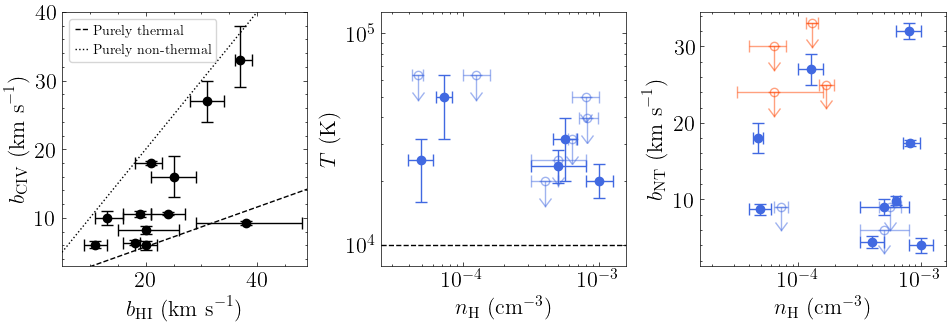

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(3.8*3, 3.3*1))

# b(HI) vs. b(CIV)
for i in range(len(b_HI_arr)):
    plot_str(axes[0], b_HI_arr[i], b_CIV_arr[i], .1, .1, 'o', 'black', 'black', 1, 1, 1)
    #axes[0].axvline(float(logN_CIV_arr[i].split(',')[0]), linestyle=':', lw=.4)
    
x = np.arange(0,50,1)
axes[0].plot(x, np.sqrt(1.00797/12.011)*x, color='black', linestyle='--', label='Purely thermal')
axes[0].plot(x, x, color='black', linestyle=':', label='Purely non-thermal')
axes[0].legend(loc='upper left', fontsize=10, handletextpad=0.3, handlelength=1)
axes[0].set_xlim(5,49)
axes[0].set_ylim(3,40)
axes[0].set_xlabel(r'$b_{\mathrm{HI}} \ (\mathrm{km \ s}^{-1})$')
axes[0].set_ylabel(r'$b_{\mathrm{CIV}} \ (\mathrm{km \ s}^{-1})$')

# hdens vs. T
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
    
    plot_str(axes[1], log_hdens_arr[i], logT_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1, 1.5)
    
axes[1].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[1].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[1].set_xticks(np.log10(x), minor=True)
axes[1].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[1].set_yticks(np.log10(y), minor=True)
axes[1].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[1].axhline(4, linestyle='--')
axes[1].set_xlim(-4.6, -2.8)
axes[1].set_ylim(3.9,5.1)

# hdens vs. b_NT
for i in range(len(b_NT_arr)):
    
    if b_NT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
    
    plot_str(axes[2], log_hdens_arr[i], b_NT_arr[i], .1, 2, 'o', colors_list[i], fc, a, 1, 1.6)
    
axes[2].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[2].set_ylabel(r'$b_\mathrm{NT} \ (\mathrm{km \ s}^{-1})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[2].set_xticks(np.log10(x), minor=True)
axes[2].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
#axes[2].set_yticks(np.log10(y), minor=True)
#axes[2].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[2].set_xlim(-4.8, -2.8)
#axes[2].set_ylim(4.2,6.05)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig(rootdir+'Figures/CIV_multiphase.pdf', dpi=300)
plt.savefig(rootdir+'Figures/CIV_multiphase.png', dpi=300)

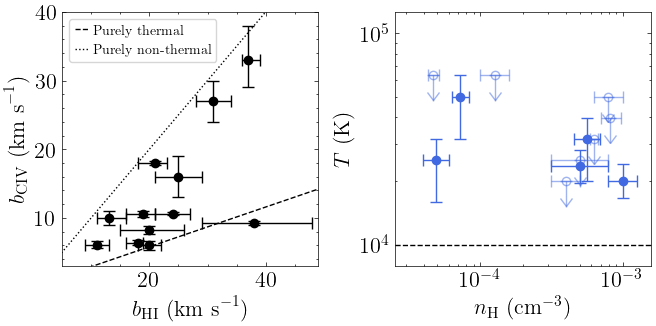

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(3.8*2, 3.3*1))

# b(HI) vs. b(CIV)
for i in range(len(b_HI_arr)):
    plot_str(axes[0], b_HI_arr[i], b_CIV_arr[i], .1, .1, 'o', 'black', 'black', 1, 1, 1)
    #axes[0].axvline(float(logN_CIV_arr[i].split(',')[0]), linestyle=':', lw=.4)
    
x = np.arange(0,50,1)
axes[0].plot(x, np.sqrt(1.00797/12.011)*x, color='black', linestyle='--', label='Purely thermal')
axes[0].plot(x, x, color='black', linestyle=':', label='Purely non-thermal')
axes[0].legend(loc='upper left', fontsize=10, handletextpad=0.3, handlelength=1)
axes[0].set_xlim(5,49)
axes[0].set_ylim(3,40)
axes[0].set_xlabel(r'$b_{\mathrm{HI}} \ (\mathrm{km \ s}^{-1})$')
axes[0].set_ylabel(r'$b_{\mathrm{CIV}} \ (\mathrm{km \ s}^{-1})$')

# hdens vs. T
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
    
    plot_str(axes[1], log_hdens_arr[i], logT_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1, 1.5)
    
axes[1].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[1].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[1].set_xticks(np.log10(x), minor=True)
axes[1].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[1].set_yticks(np.log10(y), minor=True)
axes[1].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[1].axhline(4, linestyle='--')
axes[1].set_xlim(-4.6, -2.8)
axes[1].set_ylim(3.9,5.1)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig(rootdir+'Figures/CIV_temperatures.pdf', dpi=300)
plt.savefig(rootdir+'Figures/CIV_temperatures.png', dpi=300)

## Temperature difference

In [10]:
logT_PIE_arr = ['4.32, -0.02, +0.02',
                '4.33, -0.09, +0.09',
                '4.06, -0.09, +0.07',
                '4.5, -0.2, +0.1',
                '3.9, -0.1, +0.1',
                '4.24, -0.04, +0.04',
                '4.4, -0.1, +0.1',
                '4.32, -0.03, +0.03',
                '4.03, -0.07, +0.07',
                '4.0, -0.1, +0.2',
                '4.55, -0.04, +0.04',
                '4.45, -0.01, +0.01',
                '4.52, -0.01, +0.01',
                '<4.1',
                '4.43, -0.02, +0.02',
                '4.42, -0.02, +0.02',]

In [11]:
log_metals_arr = ['-0.85, -0.05, +0.05',
                '<0.8',
                '-0.1, -0.1, +0.1',
                '<0.8',
                '0.4, -0.1, +0.1',
                '-0.4, -0.1, +0.1',
                '<1.0',
                '-0.70, -0.08, +0.08',
                '0.0, -0.1, +0.1',
                '<1.0',
                '-1.6, -0.2, +0.2',
                '-1.85, -0.04, +0.04',
                '-0.78, -0.04, +0.04',
                '0.6, -0.1, +0.2',
                '-0.32, -0.06, +0.06',
                '-0.50, -0.05, +0.05',
                ]

In [12]:
metals_color = ['green',
                'gray',
                'orange',
                'gray',
                'red',
                'orange',
                'gray',
                'green',
                'orange',
                'gray',
                'blue',
                'blue',
                'green',
                'red',
                'orange',
                'orange']

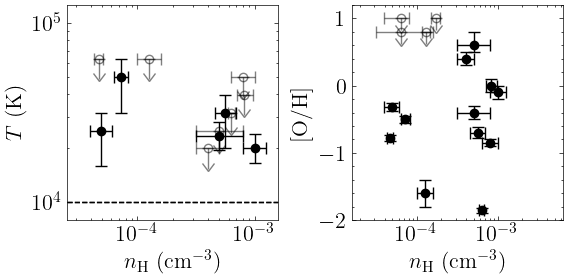

In [13]:
fig, axes = plt.subplots(1,2, figsize=(3.2*2, 2.8))

# hdens vs. T
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc='black'
        a=1
    
    plot_str(axes[0], log_hdens_arr[i], logT_arr[i], .1, .08, 'o', 'black', fc, a, 1, 1.4)
    
axes[0].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$T \ (\mathrm{K})$')
axes[0].set_ylim(3.9, 5.0)

axes[0].axhline(4.0, linestyle='--')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[0].set_xticks(np.log10(x), minor=True)
axes[0].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[0].axhline(4, linestyle='--')
axes[0].set_xlim(-4.6, -2.8)
axes[0].set_ylim(3.9,5.1)

# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = 'black'
        a=1
    plot_str(axes[1], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o','black', fc, a, 1, 1.8)
    
axes[1].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[1].set_ylabel(r'$\mathrm{[O/H]}$')


x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[1].set_xticks(np.log10(x), minor=True)
axes[1].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[1].set_xlim(-4.8, -2.2)
axes[1].set_ylim(-2.,1.2)


plt.subplots_adjust(wspace=0.35, hspace=0)

plt.savefig(rootdir+'Figures/physical_props.png', dpi=300)

In [14]:
metals_color_new = ['green',
                'gray',
                'red',
                'gray',
                'red',
                'green',
                'gray',
                'green',
                'red',
                'gray',
                'blue',
                'blue',
                'green',
                'red',
                'green',
                'green']

(3.8, 5.1)

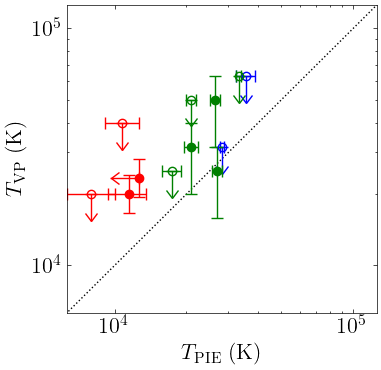

In [15]:
fig, ax = plt.subplots(1, figsize=(4,4))

x = np.arange(3.5,6,.1)

ax.plot(x,x,linestyle=':',color='black')

# T_PIE vs. T_VP
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=1
    else:
        fc=metals_color_new[i]
        a=1
    
    plot_str(ax, logT_PIE_arr[i], logT_arr[i], .08, .08, 'o', metals_color_new[i], fc, a, 1.5, 1.4)
    
ax.set_xlabel(r'$T_\mathrm{PIE} \ (\mathrm{K})$')
ax.set_ylabel(r'$T_\mathrm{VP} \ (\mathrm{K})$')

x = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        x.append(i*j)
        
ax.set_xticks(np.log10(x), minor=True)
ax.set_xticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
ax.set_yticks(np.log10(y), minor=True)
ax.set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

ax.set_xlim(3.8,5.1)
ax.set_ylim(3.8,5.1)

In [16]:
DlogT_arr = ['<0.4',
         '<1.7',
         '0.2, -0.1, +0.1',
         '<1.3',
         '<0.4',
         '<0.2',
         '<1.6',
         '0.2, -0.2, +0.1',
         '<0.6',
         '<1.8',
         '<0.2',
         '<0.1',
         '<0.3',
         '>0.3',
         '0.0, -0.2, +0.1',
         '0.3, -0.2, +0.1']

(-0.23, 0.65)

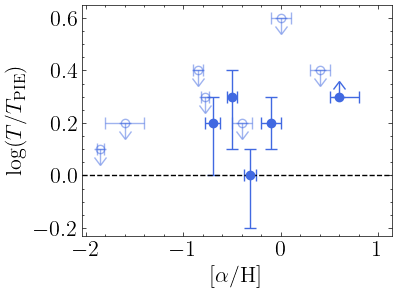

In [17]:
fig, ax = plt.subplots(1, figsize=(4,3))

# metals vs. DT
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
    
    plot_str(ax, log_metals_arr[i], DlogT_arr[i], .1, .03, 'o', colors_list[i], fc, a, 1, 1.9)
    
ax.set_xlabel(r'$\mathrm{[\alpha/H]}$')
ax.set_ylabel(r'$\log(T/T_\mathrm{PIE})$')

ax.axhline(0, linestyle='--')

ax.set_ylim(-0.23,0.65)

#plt.savefig(rootdir+'Figures/logT_diff.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/logT_diff.png', dpi=300)

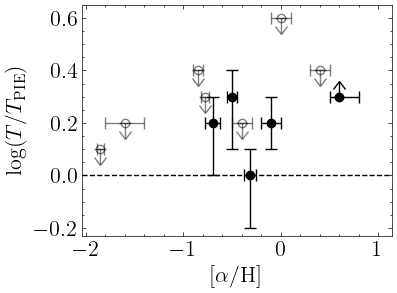

In [18]:
fig, ax = plt.subplots(1, figsize=(4,3))

# metals vs. DT
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc='black'
        a=1
    
    plot_str(ax, log_metals_arr[i], DlogT_arr[i], .1, .03, 'o', 'black', fc, a, 1, 1.9)
    
ax.set_xlabel(r'$\mathrm{[\alpha/H]}$')
ax.set_ylabel(r'$\log(T/T_\mathrm{PIE})$')

ax.axhline(0, linestyle='--')

ax.set_ylim(-0.23,0.65)

plt.savefig(rootdir+'Figures/logT_diff_v2.pdf', dpi=300)
plt.savefig(rootdir+'Figures/logT_diff_v2.png', dpi=300)

## Chemical enrichment

### V1

In [19]:
colors_list = ['goldenrod', # z=0.67, c2H
               'goldenrod', # z=0.67, c2L
               'mediumblue', # z=1.04, c1H
               'mediumblue', # z=1.04, c1L
               'mediumblue', # z=1.04, c2
               'mediumblue', # z=1.04, c3H
               'mediumblue', # z=1.04, c3L
               'mediumblue', # z=1.04, c4
               'darkred', # z=1.09, c2H
               'darkred', # z=1.09, c2L
               'orchid', # z=1.17, c1
               'orchid', # z=1.17, c2
               'darksalmon', # z=1.23, c2
               'darkgreen', # z=1.25, c3
               'mediumturquoise', # z=1.27, c1
               'mediumturquoise'] # z=1.27, c2

In [20]:
C_O_arr = ['-0.32, -0.07, +0.09',
            '<-0.5',
            '-0.2, -0.2, +0.2',
            '<1.3',
            '-0.25, -0.06, +0.06',
            '-0.1, -0.2, +0.3',
            '<0.8',
            '0.1, -0.1, +0.1',
            '0.4, -0.1, +0.2',
            '<-0.4',
            '-0.1, -0.1, +0.1',
            '-0.18, -0.04, +0.04',
            '-0.45, -0.07, +0.07',
            '0.00, -0.09, +0.09',
            '-0.06, -0.05, +0.05',
            '-0.03, -0.05, +0.05',]

In [21]:
len(log_metals_arr), len(C_O_arr)

(16, 16)

In [22]:
plot_list = [True, # z=0.67, c2H
             True, # z=0.68, c2L
             True, # z=1.04, c1H
             True, #False, # z=1.04, c1L
             True, # z=1.04, c2
             True, # z=1.04, c3H
             True, #False, # z=1.04, c3L
             True, # z=1.04, c4
             True, # z=1.09, c2H
             False, # z=1.09, c2L
             True, # z=1.17, c1
             True, # z=1.17, c2
             True, # z=1.23, c2
             True, # z=1.25, c3
             True, # z=1.27, c1
             True,] # z=1.27, c2

CUBS measurements

In [23]:
CUBS_table = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_table.dat', dtype='str')

In [24]:
# Metallicities
log_metals_CUBS = []
C_O_CUBS = []
plot_list_CUBS = []

for i in range(len(CUBS_table)):
    
    # Metallicities
    metals = CUBS_table[i,1]
    dmetals_hi = CUBS_table[i,2]
    dmetals_lo = CUBS_table[i,3]
    
    if dmetals_hi == '-99': # Upper limit
        log_metals_CUBS.append('<'+str(np.round(float(metals)+np.log10(3/2), 2))) # 2sig -> 3sig
    elif dmetals_hi == '99': # Lower limit
        log_metals_CUBS.append('>'+str(np.round(float(metals)-np.log10(3/2), 2))) 
    else:
        log_metals_CUBS.append(metals+', -'+dmetals_lo+', +'+dmetals_hi)
        
    # C_O
    C_O = CUBS_table[i,10]
    dC_O_hi = CUBS_table[i,11]
    dC_O_lo = CUBS_table[i,12]
    
    if C_O == '...':
        C_O_CUBS.append('')
    elif dC_O_hi == '-99': # Upper limit
        C_O_CUBS.append('<'+str(np.round(float(C_O)+.07, 2)))
    elif dC_O_hi == '99': # Lower limit
        C_O_CUBS.append('>'+str(np.round(float(C_O)-.07, 2)))
    else:
        C_O_CUBS.append(C_O+', -'+dC_O_lo+', +'+dC_O_hi)

In [25]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07
-0.89, -0.30, +0.43 | <-0.27
<0.09 | >-0.94
-0.61, -0.46, +0.57 | >-1.16
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25
-0.57, -0.37, +0.42 | <2.74
<-0.07 | >0.03
<-0.32 | >0.52
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28
-0.19, -0.32, +0.61 | >-0.7
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22
<0.09 | >-0.35
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34
<1.01 | 0.40, -0.62, +0.86
-0.42, -0.09, +0.14 | >0.11
-0.30, -0.28, +0.23 | >0.3
-0.03, -0.09, +0.06 | >0.32
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10
>-1.12 | <-0.26
-0.12, -0.11, +0.11 | 0.27, -0.13, +0.11
-0.07, -0.23, +0.12 | -1.07, -0.22, +0.23
0.08, -0.05, +0.05 | 0.33, -0.14, +0.14
>-1.37 | -0.28, -0.17, +0.18
<-0.25 | 
<0.66 | 
-0.12, -0.06, +0.06 | -0.15, -0.23, 

In [26]:
plot_list_CUBS = [True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 False,
                 False,
                 True,
                 False,
                 False]

In [27]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i], '|', plot_list_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12 | True
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18 | True
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07 | True
-0.89, -0.30, +0.43 | <-0.27 | True
<0.09 | >-0.94 | True
-0.61, -0.46, +0.57 | >-1.16 | False
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08 | True
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21 | True
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25 | True
-0.57, -0.37, +0.42 | <2.74 | False
<-0.07 | >0.03 | True
<-0.32 | >0.52 | True
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28 | True
-0.19, -0.32, +0.61 | >-0.7 | False
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25 | True
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22 | True
<0.09 | >-0.35 | True
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34 | True
<1.01 | 0.40, -0.62, +0.86 | False
-0.42, -0.09, +0.14 | >0.11 | True
-0.30, -0.28, +0.23 | >0.3 | True
-0.03, -0.09, +0.06 | >0.32 | True
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21 | True
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10 | True
>-1.12 | <-0.26 | False
-0.12, -0.11, +0.11 | 0.27,

Disk+halo stars

In [28]:
disk_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_disk.dat', dtype='str')
halo_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_halo.dat', dtype='str')

ISM

In [29]:
sf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies.dat', dtype='str')
dwarf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies_dwarfs.dat', dtype='str')

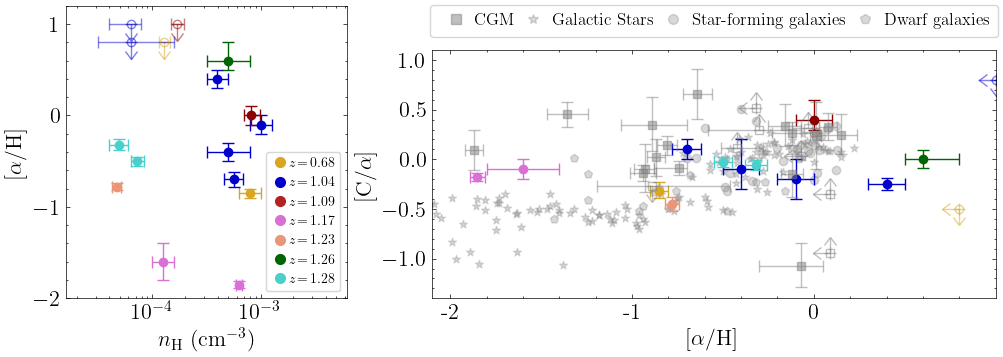

In [30]:
fig, axd = plt.subplot_mosaic([['left','upper right'],
                               ['left','lower right']],
                               figsize=(12,3.8), gridspec_kw={'height_ratios': [1,40], 'width_ratios': [1,2]})


# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axd['left'], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
axd['left'].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axd['left'].set_ylabel(r'$\mathrm{[\alpha/H]}$')

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='')
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='')
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='firebrick', markerfacecolor='firebrick', linestyle='')
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='')
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='')
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='')
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='')

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
axd['left'].legend(handles=handles, fontsize=10, loc='lower right', ncol=1, columnspacing=0.1, 
               handlelength=1.2, handletextpad=0.06)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axd['left'].set_xticks(np.log10(x), minor=True)
axd['left'].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axd['left'].set_xlim(-4.8, -2.2)
axd['left'].set_ylim(-2.,1.2)

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if plot_list[i] == True:
        if C_O_arr[i][0]=='<':
            fc = 'none'
            a=.5
        else:
            fc = colors_list[i]
            a=1
        plot_str(axd['lower right'], log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if plot_list_CUBS[i]==True:
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'grey'
            a=.5
        plot_str(axd['lower right'], log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
axd['lower right'].scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
axd['lower right'].scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
axd['lower right'].scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
axd['lower right'].scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)

axd['lower right'].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axd['lower right'].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axd['lower right'].set_xlim(-2.1,1.)
axd['lower right'].set_ylim(-1.4, 1.1)

axd['lower right'].set_xticks([-2,-1,0], [-2,-1,0])

axd['upper right'].spines['top'].set_visible(False)
axd['upper right'].spines['right'].set_visible(False)
axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].spines['left'].set_visible(False)
axd['upper right'].get_xaxis().set_ticks([])
axd['upper right'].get_yaxis().set_ticks([])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
axd['upper right'].legend(handles=handles, fontsize=12.25, loc='upper right', ncol=4, 
               columnspacing=0.1, handletextpad=0.1, bbox_to_anchor=(1.02, 2.5),borderpad=.5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

### V2

In [31]:
colors_list = ['goldenrod', # z=0.67, c2H
               'goldenrod', # z=0.67, c2L
               'mediumblue', # z=1.04, c1H
               'mediumblue', # z=1.04, c1L
               'mediumblue', # z=1.04, c2
               'mediumblue', # z=1.04, c3H
               'mediumblue', # z=1.04, c3L
               'mediumblue', # z=1.04, c4
               'darkred', # z=1.09, c2H
               'darkred', # z=1.09, c2L
               'orchid', # z=1.17, c1
               'orchid', # z=1.17, c2
               'darksalmon', # z=1.23, c2
               'darkgreen', # z=1.25, c3
               'mediumturquoise', # z=1.27, c1
               'mediumturquoise'] # z=1.27, c2

In [32]:
C_O_arr = ['-0.32, -0.07, +0.09',
            '<-0.5',
            '-0.2, -0.2, +0.2',
            '<1.3',
            '-0.25, -0.06, +0.06',
            '-0.1, -0.2, +0.3',
            '<0.8',
            '0.1, -0.1, +0.1',
            '0.4, -0.1, +0.2',
            '<-0.4',
            '-0.1, -0.1, +0.1',
            '-0.18, -0.04, +0.04',
            '-0.45, -0.07, +0.07',
            '0.00, -0.09, +0.09',
            '-0.06, -0.05, +0.05',
            '-0.03, -0.05, +0.05',]

In [33]:
len(log_metals_arr), len(C_O_arr)

(16, 16)

In [34]:
plot_list = [True, # z=0.67, c2H
             True, # z=0.68, c2L
             True, # z=1.04, c1H
             True, #False, # z=1.04, c1L
             True, # z=1.04, c2
             True, # z=1.04, c3H
             True, #False, # z=1.04, c3L
             True, # z=1.04, c4
             True, # z=1.09, c2H
             False, # z=1.09, c2L
             True, # z=1.17, c1
             True, # z=1.17, c2
             True, # z=1.23, c2
             True, # z=1.25, c3
             True, # z=1.27, c1
             True,] # z=1.27, c2

CUBS measurements

In [35]:
CUBS_table = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_table.dat', dtype='str')

In [36]:
# Metallicities
log_metals_CUBS = []
C_O_CUBS = []
plot_list_CUBS = []

for i in range(len(CUBS_table)):
    
    # Metallicities
    metals = CUBS_table[i,1]
    dmetals_hi = CUBS_table[i,2]
    dmetals_lo = CUBS_table[i,3]
    
    if dmetals_hi == '-99': # Upper limit
        log_metals_CUBS.append('<'+str(np.round(float(metals)+np.log10(3/2), 2))) # 2sig -> 3sig
    elif dmetals_hi == '99': # Lower limit
        log_metals_CUBS.append('>'+str(np.round(float(metals)-np.log10(3/2), 2))) 
    else:
        log_metals_CUBS.append(metals+', -'+dmetals_lo+', +'+dmetals_hi)
        
    # C_O
    C_O = CUBS_table[i,10]
    dC_O_hi = CUBS_table[i,11]
    dC_O_lo = CUBS_table[i,12]
    
    if C_O == '...':
        C_O_CUBS.append('')
    elif dC_O_hi == '-99': # Upper limit
        C_O_CUBS.append('<'+str(np.round(float(C_O)+.07, 2)))
    elif dC_O_hi == '99': # Lower limit
        C_O_CUBS.append('>'+str(np.round(float(C_O)-.07, 2)))
    else:
        C_O_CUBS.append(C_O+', -'+dC_O_lo+', +'+dC_O_hi)

In [37]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07
-0.89, -0.30, +0.43 | <-0.27
<0.09 | >-0.94
-0.61, -0.46, +0.57 | >-1.16
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25
-0.57, -0.37, +0.42 | <2.74
<-0.07 | >0.03
<-0.32 | >0.52
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28
-0.19, -0.32, +0.61 | >-0.7
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22
<0.09 | >-0.35
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34
<1.01 | 0.40, -0.62, +0.86
-0.42, -0.09, +0.14 | >0.11
-0.30, -0.28, +0.23 | >0.3
-0.03, -0.09, +0.06 | >0.32
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10
>-1.12 | <-0.26
-0.12, -0.11, +0.11 | 0.27, -0.13, +0.11
-0.07, -0.23, +0.12 | -1.07, -0.22, +0.23
0.08, -0.05, +0.05 | 0.33, -0.14, +0.14
>-1.37 | -0.28, -0.17, +0.18
<-0.25 | 
<0.66 | 
-0.12, -0.06, +0.06 | -0.15, -0.23, 

In [38]:
plot_list_CUBS = [True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 False,
                 False,
                 True,
                 False,
                 False]

In [39]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i], '|', plot_list_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12 | True
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18 | True
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07 | True
-0.89, -0.30, +0.43 | <-0.27 | True
<0.09 | >-0.94 | True
-0.61, -0.46, +0.57 | >-1.16 | False
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08 | True
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21 | True
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25 | True
-0.57, -0.37, +0.42 | <2.74 | False
<-0.07 | >0.03 | True
<-0.32 | >0.52 | True
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28 | True
-0.19, -0.32, +0.61 | >-0.7 | False
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25 | True
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22 | True
<0.09 | >-0.35 | True
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34 | True
<1.01 | 0.40, -0.62, +0.86 | False
-0.42, -0.09, +0.14 | >0.11 | True
-0.30, -0.28, +0.23 | >0.3 | True
-0.03, -0.09, +0.06 | >0.32 | True
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21 | True
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10 | True
>-1.12 | <-0.26 | False
-0.12, -0.11, +0.11 | 0.27,

Disk+halo stars

In [40]:
disk_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_disk.dat', dtype='str')
halo_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_halo.dat', dtype='str')

ISM

In [41]:
sf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies.dat', dtype='str')
dwarf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies_dwarfs.dat', dtype='str')

In [42]:
import matplotlib.patches as patches

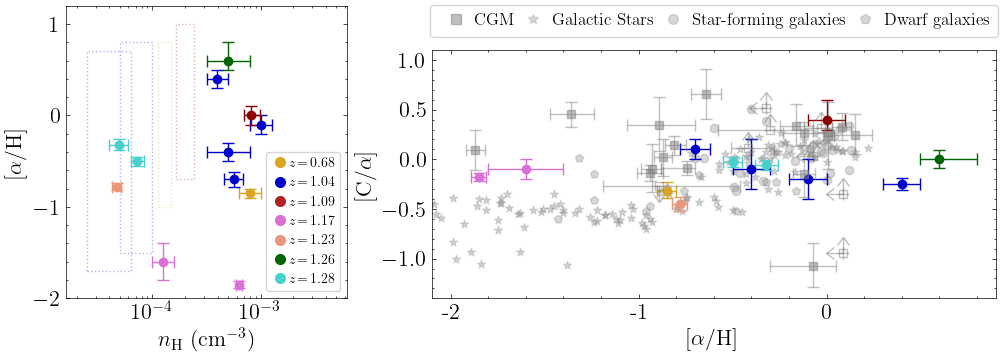

In [43]:
fig, axd = plt.subplot_mosaic([['left','upper right'],
                               ['left','lower right']],
                               figsize=(12,3.8), gridspec_kw={'height_ratios': [1,40], 'width_ratios': [1,2]})


# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]!='<':
    #    fc = 'none'
    #    a=.5
    #else:
        fc = colors_list[i]
        a=1
        plot_str(axd['left'], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
axd['left'].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axd['left'].set_ylabel(r'$\mathrm{[\alpha/H]}$')

# z=0.67, c2L
rect = patches.Rectangle((-3.95, -1.0), 0.12, 1.8, linewidth=1, linestyle=':', alpha=.3, edgecolor='goldenrod', facecolor='none')
axd['left'].add_patch(rect)

# z=1.04, c1L
rect = patches.Rectangle((-4.6, -1.7), 0.4, 2.4, linewidth=1, linestyle=':', alpha=.3, edgecolor='mediumblue', facecolor='none')
axd['left'].add_patch(rect)

# z=1.04, c3L
rect = patches.Rectangle((-4.3, -1.5), 0.3, 2.3, linewidth=1, linestyle=':', alpha=.3, edgecolor='mediumblue', facecolor='none')
axd['left'].add_patch(rect)

# z=1.09, c2L
rect = patches.Rectangle((-3.78, -0.7), 0.16, 1.7, linewidth=1, linestyle=':', alpha=.3, edgecolor='darkred', facecolor='none')
axd['left'].add_patch(rect)

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='')
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='')
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='firebrick', markerfacecolor='firebrick', linestyle='')
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='')
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='')
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='')
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='')

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
axd['left'].legend(handles=handles, fontsize=10, loc='lower right', ncol=1, columnspacing=0.1, 
               handlelength=1.2, handletextpad=0.06)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axd['left'].set_xticks(np.log10(x), minor=True)
axd['left'].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axd['left'].set_xlim(-4.8, -2.2)
axd['left'].set_ylim(-2.,1.2)

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if plot_list[i] == True:
        if C_O_arr[i][0]!='<' and log_metals_arr[i][0]!='<':
        #    fc = 'none'
        #    a=.5
        #else:
            fc = colors_list[i]
            a=1
            plot_str(axd['lower right'], log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if plot_list_CUBS[i]==True:
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'grey'
            a=.5
        plot_str(axd['lower right'], log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
axd['lower right'].scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
axd['lower right'].scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
axd['lower right'].scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
axd['lower right'].scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)

axd['lower right'].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axd['lower right'].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axd['lower right'].set_xlim(-2.1,.9)
axd['lower right'].set_ylim(-1.4, 1.1)

axd['lower right'].set_xticks([-2,-1,0], [-2,-1,0])

axd['upper right'].spines['top'].set_visible(False)
axd['upper right'].spines['right'].set_visible(False)
axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].spines['left'].set_visible(False)
axd['upper right'].get_xaxis().set_ticks([])
axd['upper right'].get_yaxis().set_ticks([])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
axd['upper right'].legend(handles=handles, fontsize=12.25, loc='upper right', ncol=4, 
               columnspacing=0.1, handletextpad=0.1, bbox_to_anchor=(1.02, 2.5),borderpad=.5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

### V3

In [44]:
log_metals_arr = ['-0.85, -0.05, +0.05',
                '-0.3, -0.3, +0.3',
                '-0.1, -0.1, +0.1',
                '-0.8, -0.6, +0.7',
                '0.4, -0.1, +0.1',
                '-0.4, -0.1, +0.1',
                '-0.4, -0.4, +0.6',
                '-0.70, -0.08, +0.08',
                '0.0, -0.1, +0.1',
                '0.3, -0.3, +0.3',
                '-1.6, -0.2, +0.2',
                '-1.85, -0.04, +0.04',
                '-0.78, -0.04, +0.04',
                '0.6, -0.1, +0.2',
                '-0.32, -0.06, +0.06',
                '-0.50, -0.05, +0.05',
                ]

In [45]:
colors_list = ['goldenrod', # z=0.67, c2H
               'goldenrod', # z=0.67, c2L
               'mediumblue', # z=1.04, c1H
               'mediumblue', # z=1.04, c1L
               'mediumblue', # z=1.04, c2
               'mediumblue', # z=1.04, c3H
               'mediumblue', # z=1.04, c3L
               'mediumblue', # z=1.04, c4
               'darkred', # z=1.09, c2H
               'darkred', # z=1.09, c2L
               'orchid', # z=1.17, c1
               'orchid', # z=1.17, c2
               'darksalmon', # z=1.23, c2
               'darkgreen', # z=1.25, c3
               'mediumturquoise', # z=1.27, c1
               'mediumturquoise'] # z=1.27, c2

In [46]:
C_O_arr = ['-0.32, -0.07, +0.09',
            '<-0.5',
            '-0.2, -0.2, +0.2',
            '<1.3',
            '-0.25, -0.06, +0.06',
            '-0.1, -0.2, +0.3',
            '<0.8',
            '0.1, -0.1, +0.1',
            '0.4, -0.1, +0.2',
            '<-0.4',
            '-0.1, -0.1, +0.1',
            '-0.18, -0.04, +0.04',
            '-0.45, -0.07, +0.07',
            '0.00, -0.09, +0.09',
            '-0.06, -0.05, +0.05',
            '-0.03, -0.05, +0.05',]

In [47]:
len(log_metals_arr), len(C_O_arr)

(16, 16)

CUBS measurements

In [48]:
CUBS_table = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_table.dat', dtype='str')

In [49]:
# Metallicities
log_metals_CUBS = []
C_O_CUBS = []
plot_list_CUBS = []

for i in range(len(CUBS_table)):
    
    # Metallicities
    metals = CUBS_table[i,1]
    dmetals_hi = CUBS_table[i,2]
    dmetals_lo = CUBS_table[i,3]
    
    # C_O
    C_O = CUBS_table[i,10]
    dC_O_hi = CUBS_table[i,11]
    dC_O_lo = CUBS_table[i,12]
    
    if dmetals_hi == '-99': # Upper limit
        log_metals_CUBS.append('<'+str(np.round(float(metals)+np.log10(3/2), 2))) # 2sig -> 3sig
    elif dmetals_hi == '99': # Lower limit
        log_metals_CUBS.append('>'+str(np.round(float(metals)-np.log10(3/2), 2))) 
    else:
        log_metals_CUBS.append(metals+', -'+dmetals_lo+', +'+dmetals_hi)
        

    
    if C_O == '...':
        C_O_CUBS.append('')
    elif dC_O_hi == '-99': # Upper limit
        C_O_CUBS.append('<'+str(np.round(float(C_O)+.07, 2)))
    elif dC_O_hi == '99': # Lower limit
        C_O_CUBS.append('>'+str(np.round(float(C_O)-.07, 2)))
    else:
        C_O_CUBS.append(C_O+', -'+dC_O_lo+', +'+dC_O_hi)

In [50]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07
-0.89, -0.30, +0.43 | <-0.27
<0.09 | >-0.94
-0.61, -0.46, +0.57 | >-1.16
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25
-0.57, -0.37, +0.42 | <2.74
<-0.07 | >0.03
<-0.32 | >0.52
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28
-0.19, -0.32, +0.61 | >-0.7
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22
<0.09 | >-0.35
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34
<1.01 | 0.40, -0.62, +0.86
-0.42, -0.09, +0.14 | >0.11
-0.30, -0.28, +0.23 | >0.3
-0.03, -0.09, +0.06 | >0.32
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10
>-1.12 | <-0.26
-0.12, -0.11, +0.11 | 0.27, -0.13, +0.11
-0.07, -0.23, +0.12 | -1.07, -0.22, +0.23
0.08, -0.05, +0.05 | 0.33, -0.14, +0.14
>-1.37 | -0.28, -0.17, +0.18
<-0.25 | 
<0.66 | 
-0.12, -0.06, +0.06 | -0.15, -0.23, 

In [51]:
plot_list_CUBS = [True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 True,
                 True,
                 True,
                 True,
                 False,
                 True,
                 False,
                 True,
                 False,
                 False,
                 False,
                 True,
                 False,
                 False]

In [52]:
for i in range(len(log_metals_CUBS)):
    print(log_metals_CUBS[i], '|', C_O_CUBS[i], '|', plot_list_CUBS[i])

-1.36, -0.11, +0.12 | 0.46, -0.13, +0.12 | True
-0.87, -0.05, +0.05 | 0.02, -0.19, +0.18 | True
-0.74, -0.14, +0.04 | -0.09, -0.07, +0.07 | True
-0.89, -0.30, +0.43 | <-0.27 | True
<0.09 | >-0.94 | True
-0.61, -0.46, +0.57 | >-1.16 | False
-0.94, -0.07, +0.07 | -0.14, -0.08, +0.08 | True
-1.87, -0.05, +0.05 | 0.09, -0.20, +0.21 | True
-0.64, -0.08, +0.08 | 0.66, -0.25, +0.25 | True
-0.57, -0.37, +0.42 | <2.74 | False
<-0.07 | >0.03 | True
<-0.32 | >0.52 | True
-0.89, -0.17, +0.19 | 0.35, -0.27, +0.28 | True
-0.19, -0.32, +0.61 | >-0.7 | False
-0.93, -0.06, +0.05 | -0.10, -0.23, +0.25 | True
-0.16, -0.09, +0.09 | 0.34, -0.21, +0.22 | True
<0.09 | >-0.35 | True
0.01, -0.03, +0.03 | 0.24, -0.34, +0.34 | True
<1.01 | 0.40, -0.62, +0.86 | False
-0.42, -0.09, +0.14 | >0.11 | True
-0.30, -0.28, +0.23 | >0.3 | True
-0.03, -0.09, +0.06 | >0.32 | True
0.15, -0.11, +0.09 | 0.25, -0.20, +0.21 | True
-0.81, -0.05, +0.06 | 0.14, -0.10, +0.10 | True
>-1.12 | <-0.26 | False
-0.12, -0.11, +0.11 | 0.27,

Disk+halo stars

In [53]:
disk_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_disk.dat', dtype='str')
halo_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_stars_halo.dat', dtype='str')

ISM

In [54]:
sf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies.dat', dtype='str')
dwarf_arr = np.loadtxt('/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/abundances_starforminggalaxies_dwarfs.dat', dtype='str')

In [55]:
fc_list = [True, # z=0.67, c2H
             False, # z=0.68, c2L
             True, # z=1.04, c1H
             False, #False, # z=1.04, c1L
             True, # z=1.04, c2
             True, # z=1.04, c3H
             False, #False, # z=1.04, c3L
             True, # z=1.04, c4
             True, # z=1.09, c2H
             False, # z=1.09, c2L
             True, # z=1.17, c1
             True, # z=1.17, c2
             True, # z=1.23, c2
             True, # z=1.25, c3
             True, # z=1.27, c1
             True,] # z=1.27, c2

In [56]:
plot_list = [True, # z=0.67, c2H
             False, # z=0.68, c2L
             True, # z=1.04, c1H
             False, #False, # z=1.04, c1L
             False, # z=1.04, c2
             True, # z=1.04, c3H
             False, #False, # z=1.04, c3L
             True, # z=1.04, c4
             True, # z=1.09, c2H
             False, # z=1.09, c2L
             True, # z=1.17, c1
             True, # z=1.17, c2
             True, # z=1.23, c2
             False, # z=1.25, c3
             True, # z=1.27, c1
             True,] # z=1.27, c2

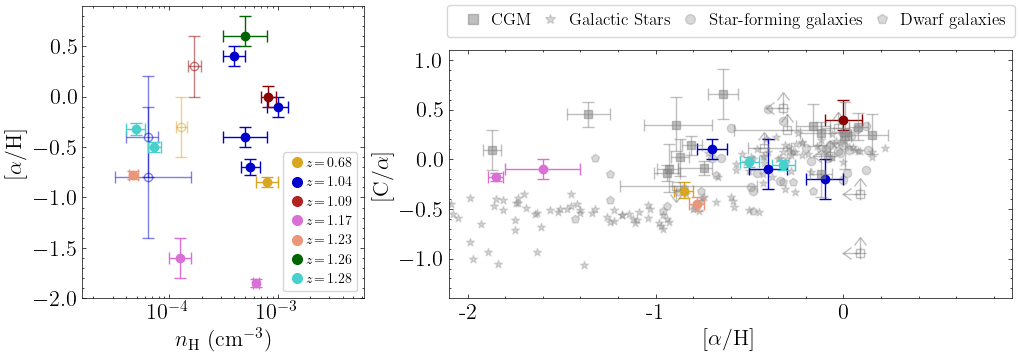

In [57]:
fig, axd = plt.subplot_mosaic([['left','upper right'],
                               ['left','lower right']],
                               figsize=(12,3.8), gridspec_kw={'height_ratios': [1,40], 'width_ratios': [1,2]})


# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if fc_list[i] == False:
    #if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axd['left'], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
axd['left'].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axd['left'].set_ylabel(r'$\mathrm{[\alpha/H]}$')

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='')
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='')
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='firebrick', markerfacecolor='firebrick', linestyle='')
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='')
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='')
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='')
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='')

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
axd['left'].legend(handles=handles, fontsize=10, loc='lower right', ncol=1, columnspacing=0.1, 
               handlelength=1.2, handletextpad=0.06)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axd['left'].set_xticks(np.log10(x), minor=True)
axd['left'].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axd['left'].set_xlim(-4.8, -2.2)
axd['left'].set_ylim(-2.,.9)

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if plot_list[i] == True:
        if C_O_arr[i][0]=='<':
            fc = 'none'
            a=.5
        else:
            fc = colors_list[i]
            a=1
        plot_str(axd['lower right'], log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if plot_list_CUBS[i]==True:
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'grey'
            a=.5
        plot_str(axd['lower right'], log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
axd['lower right'].scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
axd['lower right'].scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
axd['lower right'].scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
axd['lower right'].scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)

axd['lower right'].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axd['lower right'].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axd['lower right'].set_xlim(-2.1,.9)
axd['lower right'].set_ylim(-1.4, 1.1)

axd['lower right'].set_xticks([-2,-1,0], [-2,-1,0])

axd['upper right'].spines['top'].set_visible(False)
axd['upper right'].spines['right'].set_visible(False)
axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].spines['left'].set_visible(False)
axd['upper right'].get_xaxis().set_ticks([])
axd['upper right'].get_yaxis().set_ticks([])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
axd['upper right'].legend(handles=handles, fontsize=12.25, loc='upper right', ncol=4, 
               columnspacing=0.1, handletextpad=0.1, bbox_to_anchor=(1.02, 2.5),borderpad=.5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

(-2.0, 0.9)

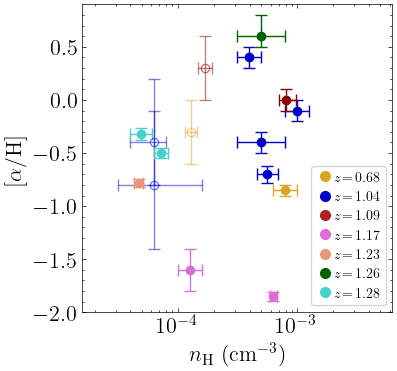

In [58]:
fig, ax = plt.subplots(1, figsize=(4,4))

# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if fc_list[i] == False:
    #if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(ax, log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
ax.set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
ax.set_ylabel(r'$\mathrm{[\alpha/H]}$')

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='')
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='')
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='firebrick', markerfacecolor='firebrick', linestyle='')
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='')
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='')
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='')
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='')

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
ax.legend(handles=handles, fontsize=10, loc='lower right', ncol=1, columnspacing=0.1, 
               handlelength=1.2, handletextpad=0.06)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
ax.set_xticks(np.log10(x), minor=True)
ax.set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

ax.set_xlim(-4.8, -2.2)
ax.set_ylim(-2.,.9)

#plt.savefig(rootdir+'Figures/CIV_metals.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_metals.png', dpi=300)

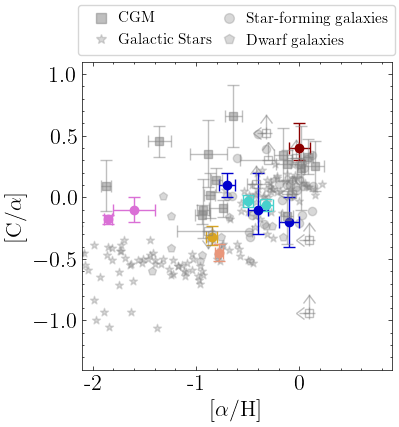

In [59]:
fig, ax = plt.subplots(1, figsize=(4,4))

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if plot_list[i] == True:
        if C_O_arr[i][0]=='<':
            fc = 'none'
            a=.5
        else:
            fc = colors_list[i]
            a=1
        plot_str(ax, log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if plot_list_CUBS[i]==True:
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'grey'
            a=.5
        plot_str(ax, log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
ax.scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
ax.scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
ax.scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
ax.scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)

ax.set_xlabel(r'$\mathrm{[\alpha/H]}$')
ax.set_ylabel(r'$\mathrm{[C/\alpha]}$')

ax.set_xlim(-2.1,.9)
ax.set_ylim(-1.4, 1.1)

ax.set_xticks([-2,-1,0], [-2,-1,0])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
ax.legend(handles=handles, fontsize=11., loc='upper right', ncol=2, 
               columnspacing=0.1, handletextpad=0.1, bbox_to_anchor=(1.032, 1.21),borderpad=.5)


#plt.savefig(rootdir+'Figures/CIV_C_O.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_C_O.png', dpi=300)

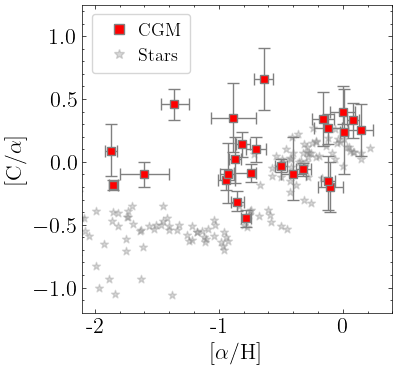

In [60]:
fig, ax = plt.subplots(1, figsize=(4,4))

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if plot_list[i] == True:
        if C_O_arr[i][0]=='<':
            fc = 'none'
            a=.5
        else:
            fc = 'red'
            a=1
        plot_str(ax, log_metals_arr[i], C_O_arr[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if plot_list_CUBS[i]==True:
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'red'
            a=1
            plot_str(ax, log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
ax.scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
ax.scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
#ax.scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
#           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
#ax.scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='o', alpha=.3)

ax.set_xlabel(r'$\mathrm{[\alpha/H]}$')
ax.set_ylabel(r'$\mathrm{[C/\alpha]}$')

ax.set_xlim(-2.1,.4)
ax.set_ylim(-1.2, 1.25)

ax.set_xticks([-2,-1,0], [-2,-1,0])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='red', linestyle='', alpha=1)
p2 = Line2D([0], [0], label='Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
#p3 = Line2D([0], [0], label='ISM', marker='o', markersize=7, 
#         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2])
ax.legend(handles=handles, fontsize=13, loc='upper left', ncol=1,
               columnspacing=0, handletextpad=0.1, borderpad=.5)

#ax.set_title('Impact of baryonic flows on CGM chemistry', fontsize=14)

plt.savefig(rootdir+'Figures/CIV_C_O_v3.pdf', dpi=300)
plt.savefig(rootdir+'Figures/CIV_C_O_v3.png', dpi=300)

## Energy partition

In [5]:
#z_arr = [0.67, 1.04, 1.04, 1.04, 1.04, 1.09, 1.17, 1.17, 1.22, 1.26, 1.27, 1.27]

b_NT_arr = ['32, -1, +1',
            '4, -1, +1',
            '4.4, -0.8, +0.8',
            '9, -1, +1',
            '<9',
            '17.4, -0.4, +0.4',
            '27, -2, +2',
            '9.8, -0.6, +0.6',
            '18, -2, +2',
            '<6',
            '8.8, -0.8, +0.6',
            '<9',]


ET_Etot_arr = [
               '0.36, -0.08, +0.08', 
               '>0.93', 
               '0.90, -0.04, +0.04', 
               '0.7, -0.1, +0.1', 
               '>0.83',
               '0.43, -0.03, +0.03', 
               '0.3, -0.1, +0.1',
               '0.82, -0.02, +0.02',
               '0.6, -0.1, +0.1',
               '>0.94',
               '0.91, -0.02, +0.02',
               '>0.97'
              ]

In [16]:
np.mean([0.36, 0.90, 0.7, 0.43, 0.3, 0.82, 0.6, 0.91])

0.6275

Text(0, 0.5, '$E_\\mathrm{T}/E_\\mathrm{total}$')

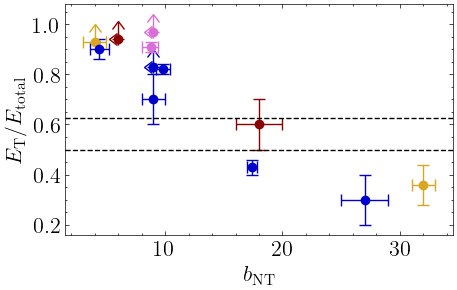

In [18]:
fig, ax = plt.subplots(1, figsize=(5,3))

# hdens vs. metals
for i in range(len(ET_Etot_arr)):
    fc = colors_list[i]
    a=1
    plot_str(ax, b_NT_arr[i], ET_Etot_arr[i], .1, .04, 'o', colors_list[i], fc, a, 1, 1.7)

ax.axhline(0.6275, linestyle = '--')    
ax.axhline(0.5, linestyle = '--')    
    
ax.set_xlabel(r'$b_\mathrm{NT}$')
ax.set_ylabel(r'$E_\mathrm{T}/E_\mathrm{total}$')

# Extras

Plot densities versus metallicities

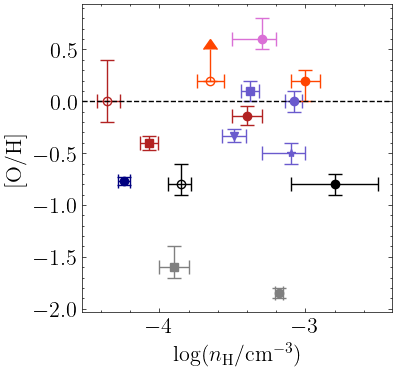

In [38]:
fig, ax = plt.subplots(1, figsize=(4,4))

# z=0.67
ax.errorbar(-2.8, -0.8, xerr = 0.3, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

ax.errorbar(-3.85, -0.8, xerr = [[0.09],[0.07]], yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
ax.errorbar(-3.08, 0.0, xerr = [0.06], yerr=[0.1], marker='o',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.38, 0.1, xerr = [0.06], yerr=[0.1], marker='s',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.49, -0.33, xerr = [0.08], yerr=[0.06], marker='v',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.1, -0.5, xerr = [[0.2],[0.1]], yerr=[0.1], marker='*',
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
ax.errorbar(-3.0, 0.2, xerr = 0.1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='orangered')

ax.errorbar(-3.65, 0.2, xerr = 0.09, yerr=0.3, marker='o', lolims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
ax.errorbar(-3.18, -1.85, xerr = [0.03], yerr=[0.05], marker='o',
           linestyle='none', capsize=5, color='grey')

ax.errorbar(-3.9, -1.6, xerr = [0.1], yerr=[[0.1],[0.2]], marker='s',
           linestyle='none', capsize=5, color='grey')


# z=1.22
ax.errorbar(-4.24, -0.77, xerr = [0.04], yerr=[0.04], marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
ax.errorbar(-3.3, 0.6, xerr = [[0.2],[0.1]], yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27

ax.errorbar(-3.4, -0.14, xerr = 0.1, yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='firebrick')

ax.errorbar(-4.36, 0., xerr = [[0.07],[0.09]], yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

ax.errorbar(-4.07, -0.40, xerr = [0.06], yerr=[0.07], marker='s',
           linestyle='none', capsize=5, color='firebrick')

ax.axhline(0, linestyle='--')
ax.set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
ax.set_ylabel(r'$\mathrm{[O/H]}$')

plt.savefig(rootdir+'Figures/n_H_metals.pdf', dpi=300)
plt.savefig(rootdir+'Figures/n_H_metals.png', dpi=300)

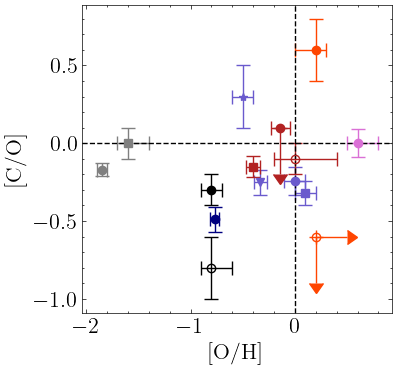

In [39]:
fig, ax = plt.subplots(1, figsize=(4,4))

# z=0.67
ax.errorbar(-0.8, -0.3, xerr = 0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

ax.errorbar(-0.8, -0.8, xerr = [[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
ax.errorbar(0.0, -0.24, xerr = [0.1], yerr=[0.09], marker='o',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(0.1, -0.32, xerr = [0.1], yerr=[0.08], marker='s',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-0.33, -0.25, xerr = [0.06], yerr=[0.08], marker='v',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-0.5, 0.3, xerr = [0.1], yerr=[0.2], marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09

ax.errorbar(0.2, 0.6, xerr = [[0.2],[0.1]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orangered')

ax.errorbar(0.2, -0.6, xerr = 0.3, yerr=0.3, marker='o', xlolims=True,uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16

ax.errorbar(-1.85, -0.17, xerr = [0.05], yerr=[0.04], marker='o',
           linestyle='none', capsize=5, color='grey')

ax.errorbar(-1.6, 0.0, xerr = [[0.1],[0.2]], yerr=[0.1], marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
ax.errorbar(-0.77, -0.49, xerr = [0.04], yerr=[0.08], marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
ax.errorbar(0.6, 0.00, xerr = [[0.1],[0.2]], yerr=[0.09], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
ax.errorbar(-0.14, 0.1, xerr = 0.09, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick')

ax.errorbar(0.0, -0.1, xerr = [[0.2],[0.4]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

ax.errorbar(-0.40, -0.15, xerr = [0.07], yerr=[0.07], marker='s',
           linestyle='none', capsize=5, color='firebrick')

ax.set_xlabel(r'$\mathrm{[O/H]}$')
ax.set_ylabel(r'$\mathrm{[C/O]}$')

ax.axhline(0, linestyle='--')
ax.axvline(0, linestyle='--')

plt.savefig(rootdir+'Figures/C_O_metals.pdf', dpi=300)
plt.savefig(rootdir+'Figures/C_O_metals.png', dpi=300)

In [40]:
x = [510.19,287.42,116.62,65.60,36.76,20.72,11.66,4.75,2.67,1.50,0.85]
y = [8.39,5.74,8.80,7.78,6.97,6.35,5.90,7.73,7.56,7.51,7.53]

x1 = [367.59,207.25,84.61,47.53,26.71,10.96,6.15,3.45,0.62,1.10,0.62]
y1 = [2.97,2.72,3.37,2.96,2.62,3.29,3.18,3.55,11.44,6.33,3.64]

x2 = [367.59,150.21,84.61,34.54,19.49,10.96,6.15,3.45,0.62,1.10,0.62]
y2 = [1.15,1.46,1.18,1.18,1.11,1.10,1.12,1.15,3.71,1.19,1.18]

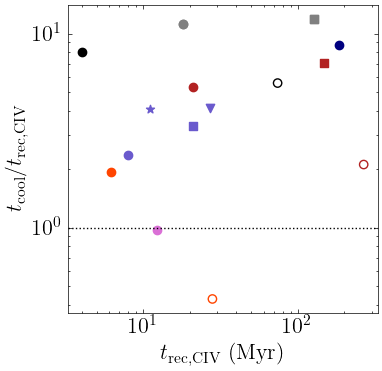

In [41]:
fig, ax = plt.subplots(1, figsize=(4,4))

# z=0.67
ax.scatter(4, 32/4, marker='o', color='black')
ax.scatter(74, 411/74, marker='o', color='black', facecolor='none')

# z=1.04
ax.scatter(8, 19/8, marker='o', color='slateblue')
ax.scatter(21, 70/21, marker='s', color='slateblue')
ax.scatter(27, 111/27, marker='v', color='slateblue')
ax.scatter(11, 45/11, marker='*', color='slateblue')

# z=1.09
ax.scatter(6.2, 12/6.2, marker='o', color='orangered')
ax.scatter(28, 12/28, marker='o', color='orangered', facecolor='none')

# z=1.16
ax.scatter(18, 201/18, marker='o', color='grey')
ax.scatter(128, 1521/128, marker='s', color='grey')

# z=1.16
ax.scatter(18, 201/18, marker='o', color='grey')
ax.scatter(128, 1521/128, marker='s', color='grey')

# z=1.22
ax.scatter(185, 1607/185, marker='o', color='navy')

# z=1.26
ax.scatter(12.3, 12.0/12.3, marker='o', color='orchid')
#ax.scatter(11, 67/11, marker='o', color='orchid')

# z=1.27
ax.scatter(21, 111/21, marker='o', color='firebrick')
ax.scatter(267, 564/267, marker='o', color='firebrick', facecolor='none')

ax.scatter(147, 1033/147, marker='s', color='firebrick')

ax.axhline(1, linestyle=':')

ax.set_xlabel(r'$t_\mathrm{rec,CIV} \ (\mathrm{Myr})$')
ax.set_ylabel(r'$t_\mathrm{cool}/t_\mathrm{rec,CIV}$')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.plot(x,y, linestyle='--', label=r'$Z=0.1Z_\odot$')
#ax.plot(x1,y1, linestyle='-.', label=r'$Z=Z_\odot$', color='black')
#ax.plot(x2,y2, linestyle=':', lw=1.5, label=r'$Z=3Z_\odot$', color='black')

#ax.set_xlim(1.1e0,3e2)
#ax.legend(fontsize=8, loc='center left')
plt.savefig(rootdir+'Figures/t_rec_t_cool.pdf', dpi=300)
plt.savefig(rootdir+'Figures/t_rec_t_cool.png', dpi=300)

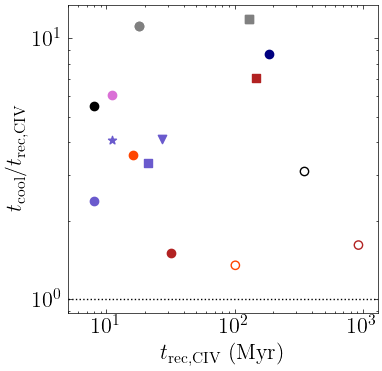

In [42]:
fig, ax = plt.subplots(1, figsize=(4,4))

# z=0.67
ax.scatter(8, 44/8, marker='o', color='black')
ax.scatter(349, 1077/349, marker='o', color='black', facecolor='none')

# z=1.04
ax.scatter(8, 19/8, marker='o', color='slateblue')
ax.scatter(21, 70/21, marker='s', color='slateblue')
ax.scatter(27, 111/27, marker='v', color='slateblue')
ax.scatter(11, 45/11, marker='*', color='slateblue')

# z=1.09
ax.scatter(16, 57/16, marker='o', color='orangered')
ax.scatter(101, 136/101, marker='o', color='orangered', facecolor='none')

# z=1.16
ax.scatter(18, 201/18, marker='o', color='grey')
ax.scatter(128, 1521/128, marker='s', color='grey')

# z=1.16
ax.scatter(18, 201/18, marker='o', color='grey')
ax.scatter(128, 1521/128, marker='s', color='grey')

# z=1.22
ax.scatter(185, 1607/185, marker='o', color='navy')

# z=1.26
ax.scatter(11, 67/11, marker='o', color='orchid')

# z=1.27
ax.scatter(32, 48/32, marker='o', color='firebrick')
ax.scatter(919, 1480/919, marker='o', color='firebrick', facecolor='none')

ax.scatter(147, 1033/147, marker='s', color='firebrick')

ax.axhline(1, linestyle=':')

ax.set_xlabel(r'$t_\mathrm{rec,CIV} \ (\mathrm{Myr})$')
ax.set_ylabel(r'$t_\mathrm{cool}/t_\mathrm{rec,CIV}$')

ax.set_xlim(5, 1.3e3)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig(rootdir+'Figures/t_rec_t_cool_TDP.pdf', dpi=300)
plt.savefig(rootdir+'Figures/t_rec_t_cool_TDP.png', dpi=300)

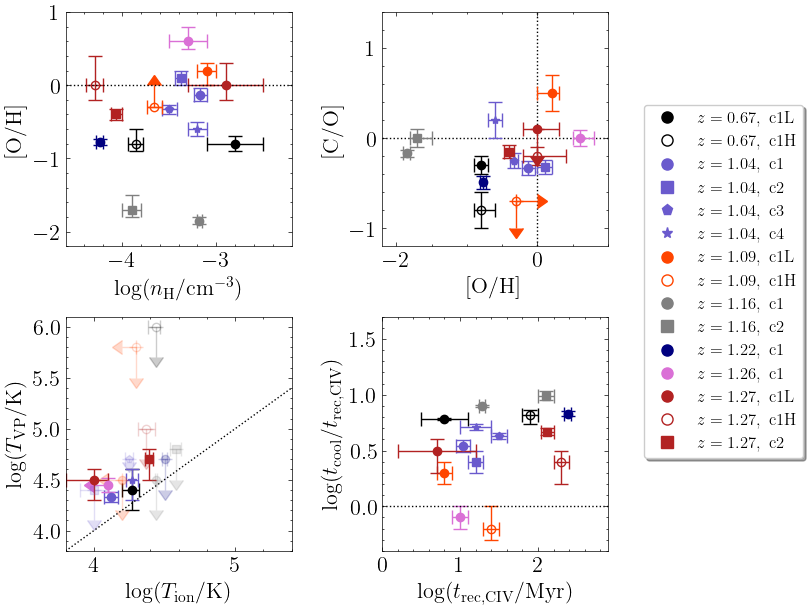

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(3.5*2, 3.5*2))

# n_H vs. metals
# z=0.67
axes[0,0].errorbar(-2.8, -0.8, xerr=0.3, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[0,0].errorbar(-3.85, -0.8, xerr=[[0.09],[0.07]], yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
axes[0,0].errorbar(-3.17, -0.13, xerr=0.07, yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[0,0].errorbar(-3.38, 0.1, xerr=0.06, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[0,0].errorbar(-3.50, -0.33, xerr=0.08, yerr=0.06, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[0,0].errorbar(-3.2, -0.6, xerr=0.1, yerr=0.1, marker='*',
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
axes[0,0].errorbar(-3.1, 0.2, xerr=0.1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0,0].errorbar(-3.66, -0.3, xerr=0.08, yerr=0.3, marker='o', lolims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
axes[0,0].errorbar(-3.18, -1.85, xerr=0.03, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='grey')

axes[0,0].errorbar(-3.9, -1.7, xerr=0.1, yerr=[[0.1],[0.2]], marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[0,0].errorbar(-4.24, -0.77, xerr=0.04, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[0,0].errorbar(-3.3, 0.6, xerr=0.2, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0,0].errorbar(-2.9, 0.0, xerr=0.4, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[0,0].errorbar(-4.29, 0.0, xerr=0.09, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0,0].errorbar(-4.06, -0.40, xerr=0.06, yerr=0.07, marker='s',
           linestyle='none', capsize=5, color='firebrick')

axes[0,0].axhline(0, linestyle=':')
axes[0,0].set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
axes[0,0].set_ylabel(r'$\mathrm{[O/H]}$')

axes[0,0].set_xlim(-4.6, -2.2)
axes[0,0].set_ylim(-2.2,1.0)

# metals vs. C_O
# z=0.67
axes[0,1].errorbar(-0.8, -0.3, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[0,1].errorbar(-0.8, -0.8, xerr=[[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

axes[0,1].axvline(0, linestyle=':')
axes[0,1].axhline(0, linestyle=':')


# z=1.04
axes[0,1].errorbar(-0.13, -0.33, xerr=0.09, yerr=0.08, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[0,1].errorbar(0.1, -0.32, xerr=0.1, yerr=0.08, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[0,1].errorbar(-0.33, -0.25, xerr=0.06, yerr=0.08, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[0,1].errorbar(-0.6, 0.2, xerr=0.1, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
axes[0,1].errorbar(0.2, 0.5, xerr=[[0.2],[0.1]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0,1].errorbar(-0.3, -0.7, xerr=0.3, yerr=0.3, marker='o', xlolims=True,uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
axes[0,1].errorbar(-1.85, -0.17, xerr=0.05, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='grey')

axes[0,1].errorbar(-1.7, 0.0, xerr=[[0.1],[0.2]], yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[0,1].errorbar(-0.77, -0.49, xerr=0.04, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[0,1].errorbar(0.6, 0.00, xerr=[[0.1],[0.2]], yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0,1].errorbar(0.0, 0.1, xerr=[[0.2],[0.3]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick')

axes[0,1].errorbar(0.0, -0.2, xerr=[[0.2],[0.4]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0,1].errorbar(-0.40, -0.15, xerr=0.07, yerr=0.07, marker='s',
           linestyle='none', capsize=5, color='firebrick')

axes[0,1].set_xlabel(r'$\mathrm{[O/H]}$')
axes[0,1].set_ylabel(r'$\mathrm{[C/O]}$')

axes[0,1].set_xlim(-2.2,1.0)
axes[0,1].set_ylim(-1.2, 1.4)

# logT_PIE, logT_VP

# z=0.67
axes[1,0].errorbar(4.27, 4.4, xerr=[[0.07], [0.05]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1,0].errorbar(4.44, 6.0, xerr=[[0.06],[0.03]], yerr=0.3, marker='o', uplims=True, alpha=.2,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
axes[1,0].errorbar(4.12, 4.33, xerr=0.05, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[1,0].errorbar(4.0, 4.4, xerr=0.1, yerr=0.3, marker='s', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='slateblue')

axes[1,0].errorbar(4.25, 4.7, xerr=0.03, yerr=0.03, marker='p', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='slateblue')

axes[1,0].errorbar(4.27, 4.5, xerr=0.04, yerr=[[0.2],[0.1]], marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
axes[1,0].errorbar(4.2, 4.5, xerr=0.1, yerr=0.3, marker='o', xuplims=True, uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='orangered')

axes[1,0].errorbar(4.3, 5.8, xerr=0.1, yerr=0.3, marker='o', xuplims=True, uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
axes[1,0].errorbar(4.44, 4.5, xerr=0.01, yerr=0.3, marker='o', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='grey')

axes[1,0].errorbar(4.58, 4.8, xerr=0.04, yerr=0.3, marker='s', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[1,0].errorbar(4.50, 4.7, xerr=0.02, yerr=0.3, marker='o', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[1,0].errorbar(4.1, 4.45, xerr=0.1, yerr=0.07, marker='o', xuplims=True,
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1,0].errorbar(4.0, 4.5, xerr=[[0.2],[0.1]], yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[1,0].errorbar(4.37, 5.0, xerr=0.06, yerr=0.3, marker='o', uplims=True,alpha=.2,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[1,0].errorbar(4.39, 4.7, xerr=0.03, yerr=[[0.2],[0.1]], marker='s',
           linestyle='none', capsize=5, color='firebrick')

t = np.arange(3.8,6.1)
axes[1,0].plot(t,t,linestyle=':')

axes[1,0].set_xlim(3.8,5.4)
axes[1,0].set_ylim(3.8,6.1)

axes[1,0].set_xlabel(r'$\log(T_\mathrm{ion}/\mathrm{K})$')
axes[1,0].set_ylabel(r'$\log(T_\mathrm{VP}/\mathrm{K})$')


# t_rec, t_cool
# z=0.67
axes[1,1].errorbar(0.8, 0.78, xerr=0.3, yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1,1].errorbar(1.9, 0.82, xerr=0.1, yerr=[[0.08],[0.04]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
axes[1,1].errorbar(1.04, 0.54, xerr=0.09, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[1,1].errorbar(1.2, 0.4, xerr=0.1, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[1,1].errorbar(1.5, 0.63, xerr=0.1, yerr=0.03, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[1,1].errorbar(1.2, 0.71, xerr=0.2, yerr=0.03, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
axes[1,1].errorbar(0.8, 0.3, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[1,1].errorbar(1.4, -0.2, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
axes[1,1].errorbar(1.28, 0.90, xerr=0.04, yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='grey')

axes[1,1].errorbar(2.1, 0.99, xerr=0.1, yerr=0.04, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[1,1].errorbar(2.38, 0.83, xerr=0.05, yerr=0.02, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[1,1].errorbar(1.0, -0.1, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1,1].errorbar(0.7, 0.5, xerr=0.5, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[1,1].errorbar(2.3, 0.4, xerr=0.1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[1,1].errorbar(2.12, 0.67, xerr=0.08, yerr=0.03, marker='s',
           linestyle='none', capsize=5, color='firebrick')
axes[1,1].axhline(0, linestyle=':')

axes[1,1].set_xlabel(r'$\log(t_\mathrm{rec,CIV}/\mathrm{Myr})$')
axes[1,1].set_ylabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec,CIV})$')

axes[1,1].set_xlim(0,2.9)
axes[1,1].set_ylim(-0.4,1.7)

plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c1L}$', r'$z=0.67,\ \mathrm{c1H}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3}$', r'$z=1.04,\ \mathrm{c4}$',
          r'$z=1.09,\ \mathrm{c1L}$', r'$z=1.09,\ \mathrm{c1H}$',
          r'$z=1.16,\ \mathrm{c1}$', r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c1}$', r'$z=1.26,\ \mathrm{c1}$',
          r'$z=1.27,\ \mathrm{c1L}$', r'$z=1.27,\ \mathrm{c1H}$',
          r'$z=1.27,\ \mathrm{c2}$'
         ]

colors_list = ['black', 'black',
                 'slateblue', 'slateblue','slateblue','slateblue',
                 'orangered', 'orangered', 'grey', 'grey',
                 'navy', 'orchid',
                 'firebrick', 'firebrick', 'firebrick']

markers_list = ['o', 'o', 'o', 's', 'p', '*', 'o', 'o', 'o', 's', 'o', 'o', 'o' ,'o', 's']

fc_list = ['black', 'none',
                 'slateblue', 'slateblue','slateblue','slateblue',
                 'orangered', 'none', 'grey', 'grey',
                 'navy', 'orchid',
                 'firebrick', 'none', 'firebrick']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.9, 1.15),
          fancybox=True, shadow=True, ncol=1)

#plt.savefig(rootdir+'Figures/PIE_summary.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/PIE_summary.png', dpi=300)

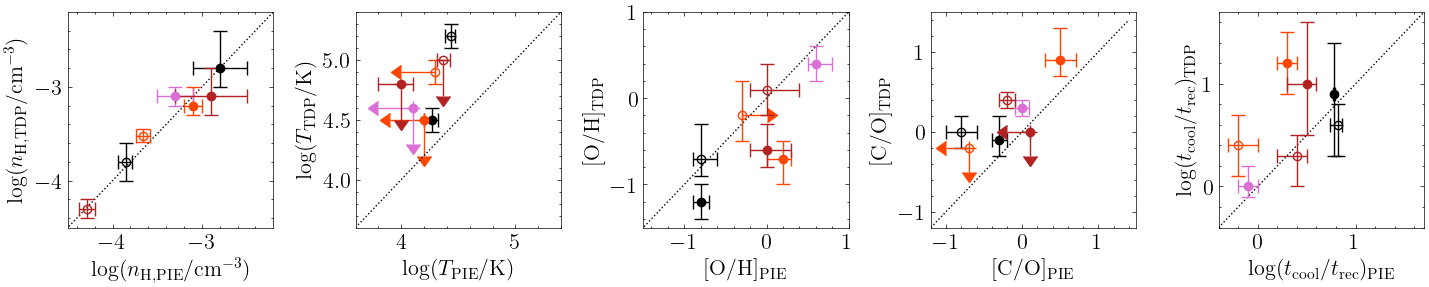

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(3.5*5, 2.8*1))

# n_H
# z=0.67
x = np.arange(-5,-2.0,0.1)
axes[0].plot(x,x,linestyle=':')

axes[0].errorbar(-2.8, -2.8, xerr=0.3, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.85, -3.8, xerr=[[0.09],[0.07]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.09
axes[0].errorbar(-3.1, -3.2, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0].errorbar(-3.66, -3.52, xerr=0.08, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[0].errorbar(-3.3, -3.1, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0].errorbar(-2.9, -3.1, xerr=0.4, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[0].errorbar(-4.29, -4.3, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].set_xlabel(r'$\log(n_\mathrm{H,PIE}/\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\log(n_\mathrm{H,TDP}/\mathrm{cm}^{-3})$')

axes[0].set_xlim(-4.5, -2.2)
axes[0].set_ylim(-4.5, -2.2)

# logT

# z=0.67
axes[1].errorbar(4.27, 4.5, xerr=[[0.07],[0.05]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(4.44, 5.2, xerr=[[0.06],[0.03]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[1].errorbar(4.2, 4.5, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='orangered')

axes[1].errorbar(4.3, 4.9, xerr=0.3, yerr=0.1, marker='o', xuplims=True, 
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[1].errorbar(4.1, 4.6, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1].errorbar(4.0, 4.8, xerr=[[0.2],[0.1]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick')

axes[1].errorbar(4.37, 5.0, xerr=0.06, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

t = np.arange(3.6,5.6,0.1)
axes[1].plot(t,t,linestyle=':')

axes[1].set_xlim(3.6,5.4)
axes[1].set_ylim(3.6,5.4)

axes[1].set_xlabel(r'$\log(T_\mathrm{PIE}/\mathrm{K})$')
axes[1].set_ylabel(r'$\log(T_\mathrm{TDP}/\mathrm{K})$')

# metals

x = np.arange(-3,1.2,0.1)
axes[2].plot(x,x,linestyle=':')

# z=0.67
axes[2].errorbar(-0.8, -1.2, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[2].errorbar(-0.8, -0.7, xerr=[[0.1],[0.2]], yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[2].errorbar(0.2, -0.7, xerr=[[0.2],[0.1]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[2].errorbar(-0.3, -0.2, xerr=0.3, yerr=[[0.3],[0.4]], marker='o', xlolims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[2].errorbar(0.6, 0.4, xerr=[[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[2].errorbar(0.0, -0.6, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[2].errorbar(0.0, 0.1, xerr=[[0.2],[0.4]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[2].set_xlabel(r'$\mathrm{[O/H]_{PIE}}$')
axes[2].set_ylabel(r'$\mathrm{[O/H]_{TDP}}$')

axes[2].set_xlim(-1.5, 1.0)
axes[2].set_ylim(-1.5, 1.0)

# C/O

x = np.arange(-1.3,1.5,0.1)
axes[3].plot(x,x,linestyle=':')

# z=0.67
axes[3].errorbar(-0.3, -0.1, xerr=0.1, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[3].errorbar(-0.8, 0.0, xerr=0.2, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[3].errorbar(0.5, 0.9, xerr=0.2, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[3].errorbar(-0.7, -0.2, xerr=0.3, yerr=0.3, marker='o', xuplims=True,uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[3].errorbar(0.00, 0.3, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[3].errorbar(0.1, 0.0, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='firebrick')

axes[3].errorbar(-0.2, 0.4, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[3].set_xlabel(r'$\mathrm{[C/O]_{PIE}}$')
axes[3].set_ylabel(r'$\mathrm{[C/O]_{TDP}}$')

axes[3].set_xlim(-1.2, 1.5)
axes[3].set_ylim(-1.2, 1.5)

# t_cool/t_rec

x = np.arange(-0.4,1.8,0.1)
axes[4].plot(x,x,linestyle=':')

# z=0.67
axes[4].errorbar(0.78, 0.9, xerr=0.01, yerr=[[0.6],[0.5]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[4].errorbar(0.82, 0.6, xerr=[[0.08],[0.04]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[4].errorbar(0.3, 1.2, xerr=0.1, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[4].errorbar(-0.2, 0.4, xerr=[[0.1],[0.2]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[4].errorbar(-0.1, 0.0, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[4].errorbar(0.5, 1.0, xerr=[[0.2],[0.1]], yerr=[[0.5],[0.6]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[4].errorbar(0.4, 0.3, xerr=[[0.2],[0.1]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[4].set_xlabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec})_\mathrm{PIE}$')
axes[4].set_ylabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec})_\mathrm{TDP}$')

axes[4].set_xlim(-0.4, 1.7)
axes[4].set_ylim(-0.4, 1.7)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.savefig(rootdir+'Figures/TDP_vs_PIE_summary.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/TDP_vs_PIE_summary.png', dpi=300)

### All-in-one summary

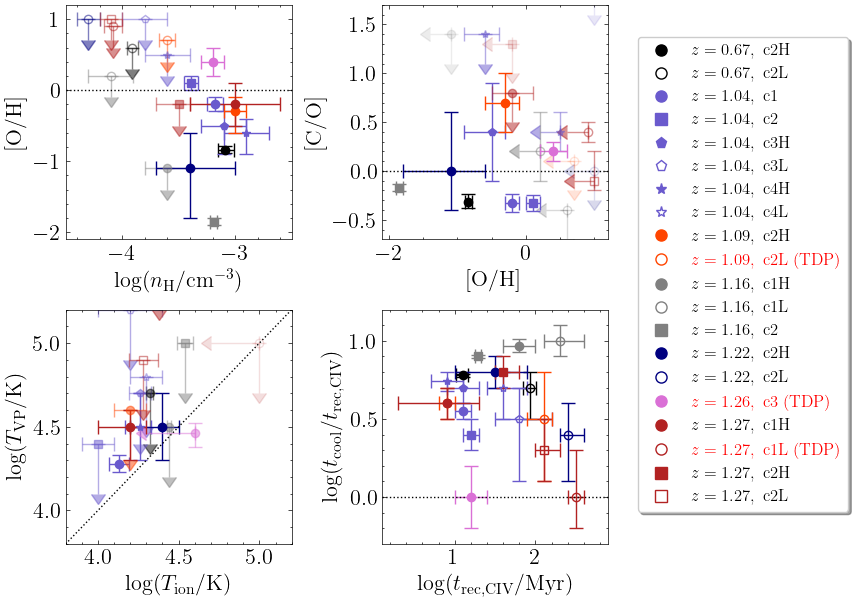

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(3.5*2, 3.5*2))

# n_H vs. metals
# z=0.67
# c2H
axes[0,0].errorbar(-3.09, -0.84, xerr=[[0.06],[0.08]], yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='black')

# c2L
axes[0,0].errorbar(-3.91, 0.6, xerr=0.05, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[0,0].errorbar(-3.18, -0.2, xerr=0.07, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[0,0].errorbar(-3.39, 0.1, xerr=0.06, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[0,0].errorbar(-3.1, -0.5, xerr=0.2, yerr=[[0.4],[0.2]], marker='p',
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[0,0].errorbar(-3.8, 1.0, xerr=0.2, yerr=0.3, marker='p', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[0,0].errorbar(-2.9, -0.6, xerr=0.2, yerr=[[0.3],[0.2]], marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[0,0].errorbar(-3.6, 0.5, xerr=0.2, yerr=0.3, marker='*', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
# c2H, PIE
axes[0,0].errorbar(-3.0, -0.3, xerr=0.1, yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

# c2L, TDP
axes[0,0].errorbar(-3.60, 0.7, xerr=0.07, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[0,0].errorbar(-3.6, -1.1, xerr=0.2, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[0,0].errorbar(-4.1, 0.2, xerr=0.2, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[0,0].errorbar(-3.19, -1.85, xerr=0.03, yerr=0.05, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[0,0].errorbar(-3.4, -1.1, xerr=[[0.3],[0.4]], yerr=[[0.7],[0.5]], marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[0,0].errorbar(-4.3, 1.0, xerr=0.1, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26, TDP
axes[0,0].errorbar(-3.2, 0.4, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[0,0].errorbar(-3.0, -0.2, xerr=0.4, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[0,0].errorbar(-4.08, 0.9, xerr=0.08, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[0,0].errorbar(-3.5, -0.2, xerr=[[0.2],[0.1]], yerr=0.3, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[0,0].errorbar(-4.1, 1.0, xerr=0.1, yerr=0.3, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')


axes[0,0].axhline(0, linestyle=':')
axes[0,0].set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
axes[0,0].set_ylabel(r'$\mathrm{[O/H]}$')

axes[0,0].set_xlim(-4.5, -2.5)
axes[0,0].set_ylim(-2.1,1.2)

# metals vs. C_O
# z=0.67
# c2H
axes[0,1].errorbar(-0.84, -0.32, xerr=0.05, yerr=[[0.06],[0.08]], marker='o',
           linestyle='none', capsize=5, color='black')

# c2L
axes[0,1].errorbar(0.6, -0.4, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
# c1
axes[0,1].errorbar(-0.2, -0.33, xerr=0.1, yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[0,1].errorbar(0.1, -0.33, xerr=0.1, yerr=0.08, marker='s',
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[0,1].errorbar(-0.5, 0.4, xerr=[[0.4],[0.2]], yerr=0.5, marker='p',
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[0,1].errorbar(1.0, 1.9, xerr=0.3, yerr=0.3, marker='p', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[0,1].errorbar(-0.6, 1.4, xerr=[[0.3],[0.2]], yerr=0.3, marker='*', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[0,1].errorbar(0.5, 0.4, xerr=0.3, yerr=0.2, marker='*', xuplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
# c2H, PIE
axes[0,1].errorbar(-0.3, 0.7,  xerr=[[0.3],[0.2]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered')

# c2L, TDP
axes[0,1].errorbar(0.7, 0.1, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[0,1].errorbar(-1.1, 1.4, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey')

# c2L
axes[0,1].errorbar(0.2, 0.2, xerr=0.3, yerr=[[0.3],[0.4]], marker='o', xuplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[0,1].errorbar(-1.85, -0.17, xerr=0.05, yerr=0.04, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[0,1].errorbar(-1.1, 0.0, xerr=[[0.7],[0.5]], yerr=[[0.4],[0.6]], marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[0,1].errorbar(1.0, 0.0, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26, TDP
axes[0,1].errorbar(0.4, 0.2, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[0,1].errorbar(-0.2, 0.8, xerr=0.3, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[0,1].errorbar(0.9, 0.4, xerr=0.3, yerr=0.1, marker='o', xuplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[0,1].errorbar(-0.2, 1.3, xerr=0.3, yerr=0.3, marker='s', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[0,1].errorbar(1.0, -0.1, xerr=0.3, yerr=[[0.1],[0.3]], marker='s', xuplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0,1].axhline(0, linestyle=':')

axes[0,1].set_xlabel(r'$\mathrm{[O/H]}$')
axes[0,1].set_ylabel(r'$\mathrm{[C/O]}$')

axes[0,1].set_xlim(-2.1,1.2)
axes[0,1].set_ylim(-0.7, 1.7)

# logT_PIE, logT_VP

# z=0.67
# c2H
axes[1,0].errorbar(4.32, 4.7, xerr=0.02, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black')

# c2L
axes[1,0].errorbar(4.35, 6.0, xerr=0.08, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
# c1
axes[1,0].errorbar(4.13, 4.28, xerr=0.06, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

# c2
axes[1,0].errorbar(4.0, 4.4, xerr=0.1, yerr=0.3, marker='s', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='slateblue')

# c3H
axes[1,0].errorbar(4.26, 4.7, xerr=0.07, yerr=0.3, marker='p',uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='slateblue')

# c3L
axes[1,0].errorbar(4.2, 5.2, xerr=0.2, yerr=0.3, marker='p',uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[1,0].errorbar(4.26, 4.5, xerr=[[0.09],[0.07]], yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[1,0].errorbar(4.3, 4.8, xerr=0.1, yerr=0.3, marker='*', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# z=1.09
# c2H, PIE
axes[1,0].errorbar(4.2, 4.6, xerr=0.1, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orangered')

# c2L, TDP
axes[1,0].errorbar(4.9, 5.8, xerr=0.1, yerr=0.3, marker='o', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[1,0].errorbar(4.54, 5.0, xerr=0.05, yerr=0.3, marker='s', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[1,0].errorbar(4.60, 5.9, xerr=[[0.08],[0.06]], yerr=0.3, marker='s', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[1,0].errorbar(4.44, 4.5, xerr=0.01, yerr=0.3, marker='o', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='grey')

# z=1.22
# c2H
axes[1,0].errorbar(4.4, 4.5, xerr=[[0.2],[0.1]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[1,0].errorbar(4.39, 5.7, xerr=0.07, yerr=0.3, marker='o', uplims=True,alpha=.5,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26
# c3, TDP
axes[1,0].errorbar(4.6, 4.46, xerr=0.3, yerr=[[0.08],[0.06]], marker='o', xuplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[1,0].errorbar(4.2, 4.5, xerr=[[0.2],[0.1]], yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[1,0].errorbar(5.0, 5.0, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,alpha=.15,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[1,0].errorbar(4.38, 5.4, xerr=0.09, yerr=[[0.2],[0.1]], marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[1,0].errorbar(4.28, 4.9, xerr=0.09, yerr=0.3, uplims=True, marker='s', alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

t = np.arange(3.8,5.3,0.1)
axes[1,0].plot(t,t,linestyle=':')

axes[1,0].set_xlim(3.8,5.2)
axes[1,0].set_ylim(3.8,5.2)

axes[1,0].set_xlabel(r'$\log(T_\mathrm{ion}/\mathrm{K})$')
axes[1,0].set_ylabel(r'$\log(T_\mathrm{VP}/\mathrm{K})$')


# t_rec, t_cool
# z=0.67
# c2H
axes[1,1].errorbar(1.10, 0.78, xerr=[[0.09],[0.07]], yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='black')

# c2L
axes[1,1].errorbar(1.93, 0.7, xerr=0.08, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.04
# c1
axes[1,1].errorbar(1.1, 0.55, xerr=0.1, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

# c2
axes[1,1].errorbar(1.2, 0.4, xerr=0.1, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

# c3H
axes[1,1].errorbar(1.1, 0.7, xerr=0.2, yerr=0.1, marker='p',
           linestyle='none', capsize=5, color='slateblue')

# c3L
axes[1,1].errorbar(1.8, 0.5, xerr=[[0.3],[0.4]], yerr=[[0.4],[0.2]], marker='p',
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[1,1].errorbar(0.9, 0.74, xerr=0.2, yerr=0.06, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[1,1].errorbar(1.6, 0.7, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.1]], marker='*',
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# z=1.09
# c2H, PIE
axes[1,1].errorbar(0.9, 0.6, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orangered')
# c2L, TDP
axes[1,1].errorbar(2.1, 0.5, xerr=[[0.2],[0.1]], yerr=[[0.4],[0.3]], marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[1,1].errorbar(1.8, 0.97, xerr=0.2, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='grey')

# c1L
axes[1,1].errorbar(2.3, 1.0, xerr=[[0.2],[0.3]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[1,1].errorbar(1.29, 0.90, xerr=0.04, yerr=0.01, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
# c1H
axes[1,1].errorbar(1.5, 0.8, xerr=[[0.5],[0.4]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='navy')

# c1L
axes[1,1].errorbar(2.4, 0.4, xerr=[[0.1],[0.2]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26
# c3, TDP
axes[1,1].errorbar(1.2, 0.0, xerr=0.2, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[1,1].errorbar(0.9, 0.6, xerr=[[0.6],[0.4]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[1,1].errorbar(2.5, 0.0, xerr=0.1, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[1,1].errorbar(1.6, 0.8, xerr=[[0.1],[0.2]], yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[1,1].errorbar(2.1, 0.3, xerr=[[0.1],[0.2]], yerr=0.2, marker='s',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[1,1].axhline(0, linestyle=':')

axes[1,1].set_xlabel(r'$\log(t_\mathrm{rec,CIV}/\mathrm{Myr})$')
axes[1,1].set_ylabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec,CIV})$')

axes[1,1].set_xlim(0.1,2.9)
axes[1,1].set_ylim(-0.3,1.2)

plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c2H}$', r'$z=0.67,\ \mathrm{c2L}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3H}$', r'$z=1.04,\ \mathrm{c3L}$',
          r'$z=1.04,\ \mathrm{c4H}$', r'$z=1.04,\ \mathrm{c4L}$',
          r'$z=1.09,\ \mathrm{c2H}$', r'$z=1.09,\ \mathrm{c2L}$ (TDP)',
          r'$z=1.16,\ \mathrm{c1H}$', r'$z=1.16,\ \mathrm{c1L}$',
          r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c2H}$', r'$z=1.22,\ \mathrm{c2L}$',
          r'$z=1.26,\ \mathrm{c3}$ (TDP)',
          r'$z=1.27,\ \mathrm{c1H}$', r'$z=1.27,\ \mathrm{c1L}$ (TDP)',
          r'$z=1.27,\ \mathrm{c2H}$', r'$z=1.27,\ \mathrm{c2L}$'
         ]

colors_list = ['black', 'black',
                 'slateblue', 'slateblue','slateblue','slateblue','slateblue','slateblue',
                 'orangered', 'orangered', 'grey', 'grey','grey',
                 'navy','navy', 'orchid',
                 'firebrick', 'firebrick', 'firebrick','firebrick']

markers_list = ['o', 'o', 'o', 's', 'p', 'p', '*', '*', 'o', 'o', 'o', 'o', 's', 'o', 'o', 'o', 'o' ,'o', 's', 's']

fc_list = ['black', 'none',
                 'slateblue', 'slateblue','slateblue', 'none', 'slateblue', 'none',
                 'orangered', 'none', 'grey', 'none', 'grey',
                 'navy', 'none', 'orchid',
                 'firebrick', 'none', 'firebrick', 'none']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
leg = plt.legend(handles=handles, loc='center right', bbox_to_anchor=(2.1, 1.15),
          fancybox=True, shadow=True, ncol=1)

leg.get_texts()[9].set_color('red')
leg.get_texts()[15].set_color('red')
leg.get_texts()[17].set_color('red')

plt.savefig(rootdir+'Figures/ion_model_full_summary.pdf', dpi=300)
plt.savefig(rootdir+'Figures/ion_model_full_summary.png', dpi=300)

### Density-temperature-metallicity

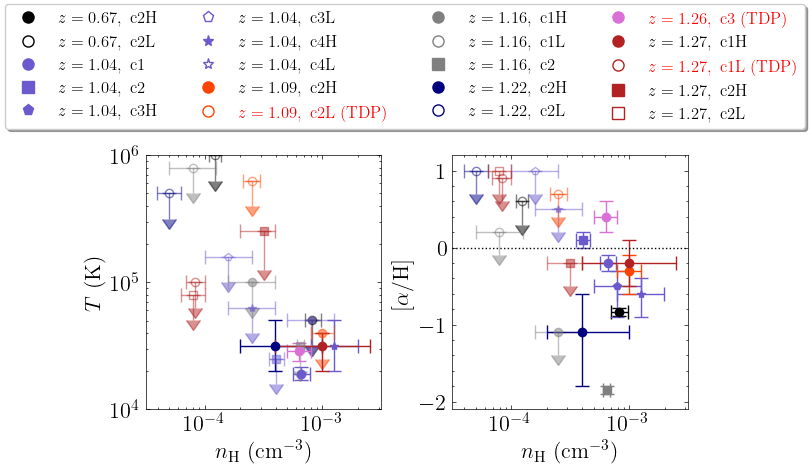

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(3.5*2, 3.3*1))

# n_H vs. logT
# z=0.67
# c2H
axes[0].errorbar(-3.09, 4.7, xerr=[[0.06],[0.08]], yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black')

# c2L
axes[0].errorbar(-3.91, 6.0, xerr=0.05, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[0].errorbar(-3.18, 4.28, xerr=0.07, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[0].errorbar(-3.39, 4.4, xerr=0.06, yerr=0.2, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[0].errorbar(-3.1, 4.7, xerr=0.2, yerr=0.2, marker='p', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[0].errorbar(-3.8, 5.2, xerr=0.2, yerr=0.2, marker='p', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[0].errorbar(-2.9, 4.5, xerr=0.2, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[0].errorbar(-3.6, 4.8, xerr=0.2, yerr=0.2, marker='*', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
# c2H, PIE
axes[0].errorbar(-3.0, 4.6, xerr=0.1, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orangered')

# c2L, TDP
axes[0].errorbar(-3.60, 5.8, xerr=0.07, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[0].errorbar(-3.6, 5.0, xerr=0.2, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[0].errorbar(-4.1, 5.9, xerr=0.2, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[0].errorbar(-3.19, 4.5, xerr=0.03, yerr=0.2, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[0].errorbar(-3.4, 4.5, xerr=[[0.3],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[0].errorbar(-4.3, 5.7, xerr=0.1, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26, TDP
axes[0].errorbar(-3.2, 4.46, xerr=0.1, yerr=[[0.08],[0.06]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[0].errorbar(-3.0, 4.5, xerr=0.4, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[0].errorbar(-4.08, 5.0, xerr=0.08, yerr=0.2, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[0].errorbar(-3.5, 5.4, xerr=[[0.2],[0.1]], yerr=0.3, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[0].errorbar(-4.1, 4.9, xerr=0.1, yerr=0.2, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')


axes[0].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[0].set_xticks(np.log10(x), minor=True)
axes[0].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[0].set_xlim(-4.5, -2.5)
axes[0].set_ylim(4.,6.)

# n_H vs. metals
# z=0.67
# c2H
axes[1].errorbar(-3.09, -0.84, xerr=[[0.06],[0.08]], yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='black')

# c2L
axes[1].errorbar(-3.91, 0.6, xerr=0.05, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[1].errorbar(-3.18, -0.2, xerr=0.07, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[1].errorbar(-3.39, 0.1, xerr=0.06, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[1].errorbar(-3.1, -0.5, xerr=0.2, yerr=[[0.4],[0.2]], marker='p',
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[1].errorbar(-3.8, 1.0, xerr=0.2, yerr=0.3, marker='p', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[1].errorbar(-2.9, -0.6, xerr=0.2, yerr=[[0.3],[0.2]], marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[1].errorbar(-3.6, 0.5, xerr=0.2, yerr=0.3, marker='*', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
# c2H, PIE
axes[1].errorbar(-3.0, -0.3, xerr=0.1, yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

# c2L, TDP
axes[1].errorbar(-3.60, 0.7, xerr=0.07, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[1].errorbar(-3.6, -1.1, xerr=0.2, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[1].errorbar(-4.1, 0.2, xerr=0.2, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[1].errorbar(-3.19, -1.85, xerr=0.03, yerr=0.05, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[1].errorbar(-3.4, -1.1, xerr=[[0.3],[0.4]], yerr=[[0.7],[0.5]], marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[1].errorbar(-4.3, 1.0, xerr=0.1, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26, TDP
axes[1].errorbar(-3.2, 0.4, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H, PIE
axes[1].errorbar(-3.0, -0.2, xerr=0.4, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L, TDP
axes[1].errorbar(-4.08, 0.9, xerr=0.08, yerr=0.3, marker='o', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[1].errorbar(-3.5, -0.2, xerr=[[0.2],[0.1]], yerr=0.3, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[1].errorbar(-4.1, 1.0, xerr=0.1, yerr=0.3, marker='s', uplims=True, alpha=.5,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')


axes[1].axhline(0, linestyle=':')
axes[1].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[1].set_ylabel(r'$\mathrm{[\alpha/H]}$')


x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[1].set_xticks(np.log10(x), minor=True)
axes[1].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[1].set_xlim(-4.5, -2.5)
axes[1].set_ylim(-2.1,1.2)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c2H}$', r'$z=0.67,\ \mathrm{c2L}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3H}$', r'$z=1.04,\ \mathrm{c3L}$',
          r'$z=1.04,\ \mathrm{c4H}$', r'$z=1.04,\ \mathrm{c4L}$',
          r'$z=1.09,\ \mathrm{c2H}$', r'$z=1.09,\ \mathrm{c2L}$ (TDP)',
          r'$z=1.16,\ \mathrm{c1H}$', r'$z=1.16,\ \mathrm{c1L}$',
          r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c2H}$', r'$z=1.22,\ \mathrm{c2L}$',
          r'$z=1.26,\ \mathrm{c3}$ (TDP)',
          r'$z=1.27,\ \mathrm{c1H}$', r'$z=1.27,\ \mathrm{c1L}$ (TDP)',
          r'$z=1.27,\ \mathrm{c2H}$', r'$z=1.27,\ \mathrm{c2L}$'
         ]

colors_list = ['black', 'black',
                 'slateblue', 'slateblue','slateblue','slateblue','slateblue','slateblue',
                 'orangered', 'orangered', 'grey', 'grey','grey',
                 'navy','navy', 'orchid',
                 'firebrick', 'firebrick', 'firebrick','firebrick']

markers_list = ['o', 'o', 'o', 's', 'p', 'p', '*', '*', 'o', 'o', 'o', 'o', 's', 'o', 'o', 'o', 'o' ,'o', 's', 's']

fc_list = ['black', 'none',
                 'slateblue', 'slateblue','slateblue', 'none', 'slateblue', 'none',
                 'orangered', 'none', 'grey', 'none', 'grey',
                 'navy', 'none', 'orchid',
                 'firebrick', 'none', 'firebrick', 'none']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
leg = plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.53, 1.35),
          fancybox=True, shadow=True, ncol=4)

leg.get_texts()[9].set_color('red')
leg.get_texts()[15].set_color('red')
leg.get_texts()[17].set_color('red')

plt.savefig(rootdir+'Figures/log_hdens_logT_log_metals.pdf', dpi=300)
plt.savefig(rootdir+'Figures/log_hdens_logT_log_metals.png', dpi=300)

### Necessity for TDP

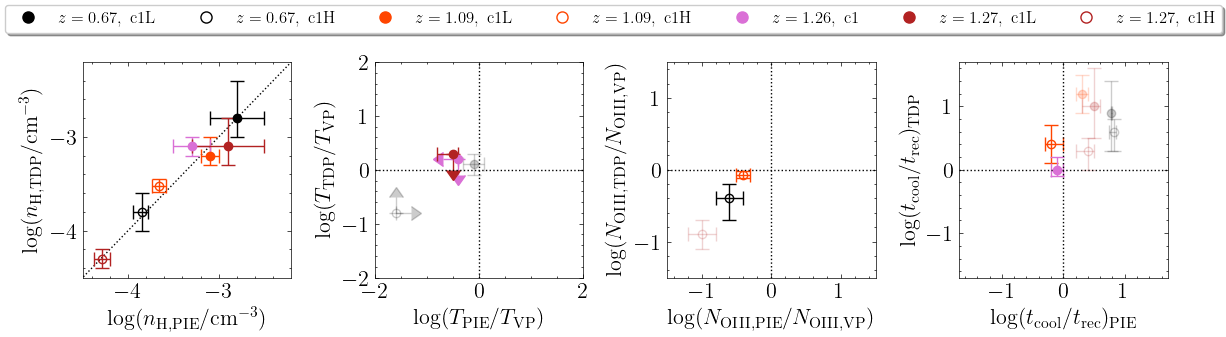

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(3.5*4, 2.8*1))

# n_H
# z=0.67

x = np.arange(-5,-2.0,0.1)
axes[0].plot(x,x,linestyle=':')

axes[0].errorbar(-2.8, -2.8, xerr=0.3, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.85, -3.8, xerr=[[0.09],[0.07]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.09
axes[0].errorbar(-3.1, -3.2, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0].errorbar(-3.66, -3.52, xerr=0.08, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[0].errorbar(-3.3, -3.1, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0].errorbar(-2.9, -3.1, xerr=0.4, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[0].errorbar(-4.29, -4.3, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].set_xlabel(r'$\log(n_\mathrm{H,PIE}/\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\log(n_\mathrm{H,TDP}/\mathrm{cm}^{-3})$')

axes[0].set_xlim(-4.5, -2.2)
axes[0].set_ylim(-4.5, -2.2)

# logT

# z=0.67
axes[1].errorbar(-0.1, 0.1, xerr=0.2, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(-1.6, -0.8, xerr=0.3, yerr=0.3, xlolims=True, lolims=True, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none', alpha=.2)

# z=1.26
axes[1].errorbar(-0.4, 0.2, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1].errorbar(-0.5, 0.3, xerr=[[0.3],[0.1]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick')


axes[1].axhline(0,linestyle=':')
axes[1].axvline(0,linestyle=':')

axes[1].set_xlabel(r'$\log(T_\mathrm{PIE}/T_\mathrm{VP})$')
axes[1].set_ylabel(r'$\log(T_\mathrm{TDP}/T_\mathrm{VP})$')

axes[1].set_xlim(-2,2)
axes[1].set_ylim(-2,2)

# logN_OIII yield

# z=0.67
axes[2].errorbar(-0.6, -0.4, xerr=0.2, yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[2].errorbar(-0.4, -0.07, xerr=0.1, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.27
axes[2].errorbar(-1.0, -0.9, xerr=0.2, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none',alpha=.2)

axes[2].axhline(0,linestyle=':')
axes[2].axvline(0,linestyle=':')

axes[2].set_xlabel(r'$\log(N_\mathrm{OIII,PIE}/N_\mathrm{OIII,VP})$')
axes[2].set_ylabel(r'$\log(N_\mathrm{OIII,TDP}/N_\mathrm{OIII,VP})$')

axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)

# t_cool/t_rec

# z=0.67
axes[3].errorbar(0.78, 0.9, xerr=0.01, yerr=[[0.6],[0.5]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[3].errorbar(0.82, 0.6, xerr=[[0.08],[0.04]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none', alpha=.2)

# z=1.09
axes[3].errorbar(0.3, 1.2, xerr=0.1, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered', alpha=.2)

axes[3].errorbar(-0.2, 0.4, xerr=[[0.1],[0.2]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[3].errorbar(-0.1, 0.0, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[3].errorbar(0.5, 1.0, xerr=[[0.2],[0.1]], yerr=[[0.5],[0.6]], marker='o',
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[3].errorbar(0.4, 0.3, xerr=[[0.2],[0.1]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none', alpha=.2)


axes[3].axhline(0,linestyle=':')
axes[3].axvline(0,linestyle=':')

axes[3].set_xlabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec})_\mathrm{PIE}$')
axes[3].set_ylabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec})_\mathrm{TDP}$')

axes[3].set_xlim(-1.7, 1.7)
axes[3].set_ylim(-1.7, 1.7)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c1L}$', r'$z=0.67,\ \mathrm{c1H}$',
          r'$z=1.09,\ \mathrm{c1L}$', r'$z=1.09,\ \mathrm{c1H}$',
          r'$z=1.26,\ \mathrm{c1}$',
          r'$z=1.27,\ \mathrm{c1L}$', r'$z=1.27,\ \mathrm{c1H}$',
         ]

colors_list = ['black', 'black',
                 'orangered', 'orangered', 
                 'orchid',
                 'firebrick', 'firebrick']

markers_list = ['o', 'o', 'o', 'o', 'o', 'o', 'o']

fc_list = ['black', 'none',
                 'orangered', 'none',
                 'orchid',
                 'firebrick', 'none']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.3, 1.2),
          fancybox=True, shadow=True, ncol=7)

plt.savefig(rootdir+'Figures/TDP_vs_PIE_summary.pdf', dpi=300)
plt.savefig(rootdir+'Figures/TDP_vs_PIE_summary.png', dpi=300)

### Variation of abundances in TDP

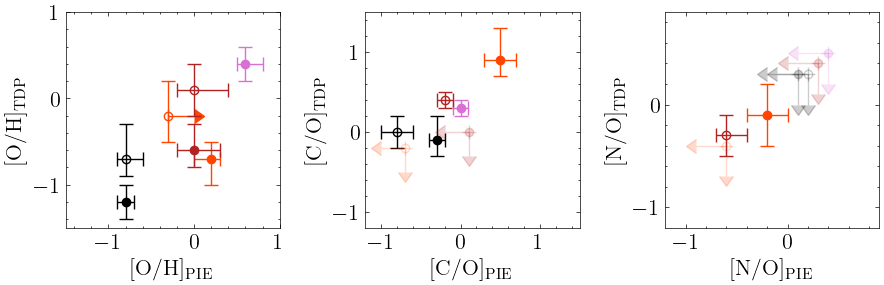

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(3.5*3, 2.8*1))

# metals

#x = np.arange(-3,1.2,0.1)
#axes[2].plot(x,x,linestyle=':')

# z=0.67
axes[0].errorbar(-0.8, -1.2, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-0.8, -0.7, xerr=[[0.1],[0.2]], yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[0].errorbar(0.2, -0.7, xerr=[[0.2],[0.1]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0].errorbar(-0.3, -0.2, xerr=0.3, yerr=[[0.3],[0.4]], marker='o', xlolims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.26
axes[0].errorbar(0.6, 0.4, xerr=[[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0].errorbar(0.0, -0.6, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[0].errorbar(0.0, 0.1, xerr=[[0.2],[0.4]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].set_xlabel(r'$\mathrm{[O/H]_{PIE}}$')
axes[0].set_ylabel(r'$\mathrm{[O/H]_{TDP}}$')

axes[0].set_xlim(-1.5, 1.0)
axes[0].set_ylim(-1.5, 1.0)

# C/O

x = np.arange(-1.3,1.5,0.1)
#axes[1].plot(x,x,linestyle=':')

# z=0.67
axes[1].errorbar(-0.3, -0.1, xerr=0.1, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(-0.8, 0.0, xerr=0.2, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

# z=1.09
axes[1].errorbar(0.5, 0.9, xerr=0.2, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[1].errorbar(-0.7, -0.2, xerr=0.3, yerr=0.3, marker='o', xuplims=True,uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none', alpha=.2)

# z=1.26
axes[1].errorbar(0.00, 0.3, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1].errorbar(0.1, 0.0, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[1].errorbar(-0.2, 0.4, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[1].set_xlabel(r'$\mathrm{[C/O]_{PIE}}$')
axes[1].set_ylabel(r'$\mathrm{[C/O]_{TDP}}$')

axes[1].set_xlim(-1.2, 1.5)
axes[1].set_ylim(-1.2, 1.5)

# N/O

x = np.arange(-1.3,1.5,0.1)
#axes[2].plot(x,x,linestyle=':')

# z=0.67
axes[2].errorbar(0.1, 0.3, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[2].errorbar(0.2, 0.3, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='black', markerfacecolor='none', alpha=.2)

# z=1.09
axes[2].errorbar(-0.2, -0.1, xerr=0.2, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[2].errorbar(-0.6, -0.4, xerr=0.3, yerr=0.3, marker='o', xuplims=True,uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none', alpha=.2)

# z=1.26
axes[2].errorbar(0.4, 0.5, xerr=0.3, yerr=0.3, marker='o', xuplims=True,uplims=True,
           linestyle='none', capsize=5, color='orchid', alpha=.2)

# z=1.27
axes[2].errorbar(0.3, 0.4, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[2].errorbar(-0.6, -0.3, xerr=[[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[2].set_xlabel(r'$\mathrm{[N/O]_{PIE}}$')
axes[2].set_ylabel(r'$\mathrm{[N/O]_{TDP}}$')

axes[2].set_xlim(-1.2, .9)
axes[2].set_ylim(-1.2, .9)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig(rootdir+'Figures/TDP_vs_PIE_abund_summary.pdf', dpi=300)
plt.savefig(rootdir+'Figures/TDP_vs_PIE_abund_summary.png', dpi=300)

### Density-metallicity, density-temperature

#### Linewidth-only

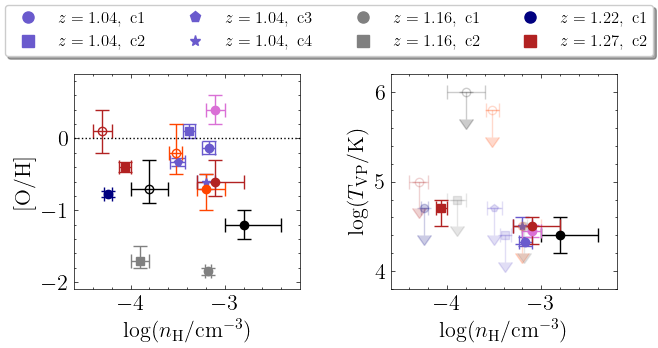

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(3.5*2, 2.8*1))

# n_H vs. metals
# z=0.67
axes[0].errorbar(-2.8, -1.2, xerr=[[0.2],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.8, -0.7, xerr=0.2, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
axes[0].errorbar(-3.17, -0.13, xerr=0.07, yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(-3.38, 0.1, xerr=0.06, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(-3.50, -0.33, xerr=0.08, yerr=0.06, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(-3.2, -0.6, xerr=0.1, yerr=0.1, marker='*',
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
axes[0].errorbar(-3.2, -0.7, xerr=[[0.1],[0.2]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0].errorbar(-3.52, -0.2, xerr=0.07, yerr=[[0.3],[0.4]], marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
axes[0].errorbar(-3.18, -1.85, xerr=0.03, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='grey')

axes[0].errorbar(-3.9, -1.7, xerr=0.1, yerr=[[0.1],[0.2]], marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[0].errorbar(-4.24, -0.77, xerr=0.04, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[0].errorbar(-3.1, 0.4, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0].errorbar(-3.1, -0.6, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[0].errorbar(-4.3, 0.1, xerr=0.1, yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].errorbar(-4.06, -0.40, xerr=0.06, yerr=0.07, marker='s',
           linestyle='none', capsize=5, color='firebrick')

axes[0].axhline(0, linestyle=':')
axes[0].set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\mathrm{[O/H]}$')

axes[0].set_xlim(-4.6, -2.2)
axes[0].set_ylim(-2.1,0.9)

# n_H vs. metals
# z=0.67
axes[1].errorbar(-2.8, 4.4, xerr=[[0.2],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(-3.8, 6.0, xerr=0.2, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='black', markerfacecolor='none', alpha=.2)


# z=1.04
axes[1].errorbar(-3.17, 4.33, xerr=0.07, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[1].errorbar(-3.38, 4.4, xerr=0.06, yerr=0.3, marker='s', uplims=True,
           linestyle='none', capsize=5, color='slateblue', alpha=.2)

axes[1].errorbar(-3.50, 4.7, xerr=0.08, yerr=0.3, marker='p', uplims=True,
           linestyle='none', capsize=5, color='slateblue', alpha=.2)

axes[1].errorbar(-3.2, 4.5, xerr=0.1, yerr=[[0.2],[0.1]], marker='*',
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
axes[1].errorbar(-3.2, 4.5, xerr=[[0.1],[0.2]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orangered', alpha=.2)

axes[1].errorbar(-3.52, 5.8, xerr=0.07, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none', alpha=.2)

# z=1.16
axes[1].errorbar(-3.18, 4.5, xerr=0.03, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='grey', alpha=.2)

axes[1].errorbar(-3.9, 4.8, xerr=0.1, yerr=0.3, marker='s', uplims=True,
           linestyle='none', capsize=5, color='grey', alpha=.2)

# z=1.22
axes[1].errorbar(-4.24, 4.7, xerr=0.04, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='navy', alpha=.2)

# z=1.26
axes[1].errorbar(-3.1, 4.45, xerr=0.1, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[1].errorbar(-3.1, 4.5, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

axes[1].errorbar(-4.3, 5.0, xerr=0.1, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none', alpha=.2)

axes[1].errorbar(-4.06, 4.7, xerr=0.06, yerr=[[0.2],[0.1]], marker='s',
           linestyle='none', capsize=5, color='firebrick')

axes[1].axhline(0, linestyle=':')
axes[1].set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
axes[1].set_ylabel(r'$\log(T_\mathrm{VP}/\mathrm{K})$')

axes[1].set_xlim(-4.6, -2.2)
axes[1].set_ylim(3.8,6.2)

plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3}$', r'$z=1.04,\ \mathrm{c4}$',
          r'$z=1.16,\ \mathrm{c1}$', r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c1}$',
          r'$z=1.27,\ \mathrm{c2}$'
         ]

colors_list = [
                 'slateblue', 'slateblue','slateblue','slateblue',
                  'grey', 'grey',
                 'navy', 
                 'firebrick']

markers_list = ['o', 's', 'p', '*', 'o', 's', 'o', 's']

fc_list = [
                 'slateblue', 'slateblue','slateblue','slateblue',
                  'grey', 'grey',
                 'navy',
                 'firebrick']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.2, 1.2),
          fancybox=True, shadow=True, ncol=4)

plt.savefig(rootdir+'Figures/log_hdens_log_metals_logT.pdf', dpi=300)
plt.savefig(rootdir+'Figures/log_hdens_log_metals_logT.png', dpi=300)

#### Preferably linewidth, otherwise ionization model

(3.8, 5.5)

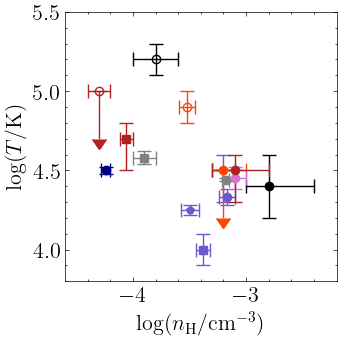

In [30]:
fig, ax = plt.subplots(1, figsize=(3.5,3.5))

# n_H vs. metals
# z=0.67
ax.errorbar(-2.8, 4.4, xerr=[[0.2],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

ax.errorbar(-3.8, 5.2, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
ax.errorbar(-3.17, 4.33, xerr=0.07, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.38, 4.0, xerr=0.06, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.50, 4.25, xerr=0.08, yerr=0.03, marker='p',
           linestyle='none', capsize=5, color='slateblue')

ax.errorbar(-3.2, 4.5, xerr=0.1, yerr=[[0.2],[0.1]], marker='*',
           linestyle='none', capsize=5, color='slateblue')


# z=1.09
ax.errorbar(-3.2, 4.5, xerr=[[0.1],[0.2]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orangered')

ax.errorbar(-3.52, 4.9, xerr=0.07, yerr=0.1, marker='o', 
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
ax.errorbar(-3.18, 4.44, xerr=0.03, yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='grey')

ax.errorbar(-3.9, 4.58, xerr=0.1, yerr=0.04, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
ax.errorbar(-4.24, 4.50, xerr=0.04, yerr=0.02, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
ax.errorbar(-3.1, 4.45, xerr=0.1, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
ax.errorbar(-3.1, 4.5, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

ax.errorbar(-4.3, 5.0, xerr=0.1, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

ax.errorbar(-4.06, 4.7, xerr=0.06, yerr=[[0.2],[0.1]], marker='s',
           linestyle='none', capsize=5, color='firebrick')

ax.axhline(0, linestyle=':')
ax.set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
ax.set_ylabel(r'$\log(T/\mathrm{K})$')

ax.set_xlim(-4.6, -2.2)
ax.set_ylim(3.8,5.5)

### Elemental abundances

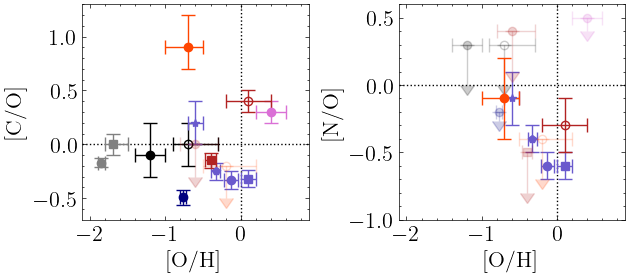

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(3.5*2, 2.8*1))

# metals vs. C_O
# z=0.67
axes[0].errorbar(-1.2, -0.1, xerr=0.2, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-0.7, 0.0, xerr=[[0.2],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')

axes[0].axvline(0, linestyle=':')
axes[0].axhline(0, linestyle=':')


# z=1.04
axes[0].errorbar(-0.13, -0.33, xerr=0.09, yerr=0.08, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(0.1, -0.32, xerr=0.1, yerr=0.08, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(-0.33, -0.25, xerr=0.06, yerr=0.08, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[0].errorbar(-0.6, 0.2, xerr=0.1, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
axes[0].errorbar(-0.7, 0.9, xerr=[[0.3],[0.2]], yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[0].errorbar(-0.2, -0.2, xerr=[[0.3],[0.4]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none', alpha=.2)

# z=1.16
axes[0].errorbar(-1.85, -0.17, xerr=0.05, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='grey')

axes[0].errorbar(-1.7, 0.0, xerr=[[0.1],[0.2]], yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22
axes[0].errorbar(-0.77, -0.49, xerr=0.04, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='navy')

# z=1.26
axes[0].errorbar(0.4, 0.3, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
axes[0].errorbar(-0.6, 0.0, xerr=[[0.2],[0.3]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[0].errorbar(0.1, 0.4, xerr=0.3, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].errorbar(-0.40, -0.15, xerr=0.07, yerr=0.07, marker='s',
           linestyle='none', capsize=5, color='firebrick')

axes[0].set_xlabel(r'$\mathrm{[O/H]}$')
axes[0].set_ylabel(r'$\mathrm{[C/O]}$')

axes[0].set_xlim(-2.1,0.9)
axes[0].set_ylim(-0.7, 1.3)

# N/O vs. metals
# z=0.67
axes[1].errorbar(-1.2, 0.3, xerr=0.2, yerr=0.3, marker='o',uplims=True,
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(-0.7, 0.3, xerr=[[0.2],[0.4]], yerr=0.3, marker='o',uplims=True,
           linestyle='none', capsize=5, color='black', markerfacecolor='none', alpha=.2)

axes[1].axvline(0, linestyle=':')
axes[1].axhline(0, linestyle=':')


# z=1.04
axes[1].errorbar(-0.13, -0.6, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='slateblue')

axes[1].errorbar(0.1, -0.6, xerr=0.1, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='slateblue')

axes[1].errorbar(-0.33, -0.4, xerr=0.06, yerr=0.1, marker='p',
           linestyle='none', capsize=5, color='slateblue')

axes[1].errorbar(-0.6, -0.1, xerr=0.1, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# z=1.09
axes[1].errorbar(-0.7, -0.1, xerr=[[0.3],[0.2]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='orangered')

axes[1].errorbar(-0.2, -0.4, xerr=[[0.3],[0.4]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none', alpha=.2)

# z=1.22
axes[1].errorbar(-0.77, -0.2, xerr=0.04, yerr=0.07, marker='o', uplims=True,
           linestyle='none', capsize=5, color='navy', alpha=.2)

# z=1.26
axes[1].errorbar(0.4, 0.5, xerr=0.2, yerr=0.1, marker='o', uplims=True,
           linestyle='none', capsize=5, color='orchid', alpha=.2)

# z=1.27
axes[1].errorbar(-0.6, 0.4, xerr=[[0.2],[0.3]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[1].errorbar(0.1, -0.3, xerr=0.3, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[1].errorbar(-0.40, -0.5, xerr=0.07, yerr=0.3, marker='s', uplims=True,
           linestyle='none', capsize=5, color='firebrick', alpha=.2)

axes[1].set_xlabel(r'$\mathrm{[O/H]}$')
axes[1].set_ylabel(r'$\mathrm{[N/O]}$')

axes[1].set_xlim(-2.1,0.9)
axes[1].set_ylim(-1., 0.6)

plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.savefig(rootdir+'Figures/rel_abund.pdf', dpi=300)
plt.savefig(rootdir+'Figures/rel_abund.png', dpi=300)

## For slides

### z=1.09 - context

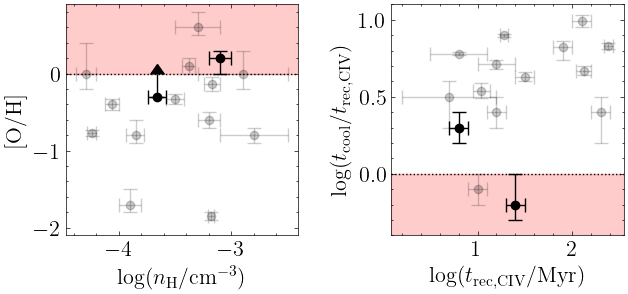

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(3.6*2, 3))

# n_H vs. metals
# z=0.67
# z=0.67
# n_H vs. metals
# z=0.67
axes[0].errorbar(-2.8, -0.8, xerr=0.3, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-3.85, -0.8, xerr=[[0.09],[0.07]], yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)


# z=1.04
axes[0].errorbar(-3.17, -0.13, xerr=0.07, yerr=0.09, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-3.38, 0.1, xerr=0.06, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-3.50, -0.33, xerr=0.08, yerr=0.06, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-3.2, -0.6, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)


# z=1.09
axes[0].errorbar(-3.1, 0.2, xerr=0.1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.66, -0.3, xerr=0.08, yerr=0.3, marker='o', lolims=True,
           linestyle='none', capsize=5, color='black')

# z=1.16
axes[0].errorbar(-3.18, -1.85, xerr=0.03, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-3.9, -1.7, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.22
axes[0].errorbar(-4.24, -0.77, xerr=0.04, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.26
axes[0].errorbar(-3.3, 0.6, xerr=0.2, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.27
axes[0].errorbar(-2.9, 0.0, xerr=0.4, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-4.29, 0.0, xerr=0.09, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[0].errorbar(-4.06, -0.40, xerr=0.06, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)


axes[0].axhline(0, linestyle=':')
axes[0].set_xlabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\mathrm{[O/H]}$')

axes[0].axhspan(0,0.9,color='red',alpha=.2)
#axes[0].axhspan(-2.1,-1.0,color='green',alpha=.2)

#axes[0].set_xlim(-4.8, -2.0)
axes[0].set_ylim(-2.1,0.9)

# t_rec, t_cool
# z=0.67
axes[1].errorbar(0.8, 0.78, xerr=0.3, yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(1.9, 0.82, xerr=0.1, yerr=[[0.08],[0.04]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.04
axes[1].errorbar(1.04, 0.54, xerr=0.09, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(1.2, 0.4, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(1.5, 0.63, xerr=0.1, yerr=0.03, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(1.2, 0.71, xerr=0.2, yerr=0.03, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.09
axes[1].errorbar(0.8, 0.3, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(1.4, -0.2, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.16
axes[1].errorbar(1.28, 0.90, xerr=0.04, yerr=0.01, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(2.1, 0.99, xerr=0.1, yerr=0.04, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.22
axes[1].errorbar(2.38, 0.83, xerr=0.05, yerr=0.02, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.26
axes[1].errorbar(1.0, -0.1, xerr=0.1, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

# z=1.27
axes[1].errorbar(0.7, 0.5, xerr=0.5, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(2.3, 0.4, xerr=0.1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)

axes[1].errorbar(2.12, 0.67, xerr=0.08, yerr=0.03, marker='o',
           linestyle='none', capsize=5, color='black', alpha=.2)
axes[1].axhline(0, linestyle=':')

axes[1].axhspan(-0.4,0.0,color='red',alpha=.2)

axes[1].set_ylim(-0.4,1.1)

plt.subplots_adjust(wspace=0.4, hspace=0.0)

axes[1].set_xlabel(r'$\log(t_\mathrm{rec,CIV}/\mathrm{Myr})$')
axes[1].set_ylabel(r'$\log(t_\mathrm{cool}/t_\mathrm{rec,CIV})$')

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c1L}$', r'$z=0.67,\ \mathrm{c1H}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3}$', r'$z=1.04,\ \mathrm{c4}$',
          r'$z=1.09,\ \mathrm{c1L}$', r'$z=1.09,\ \mathrm{c1H}$',
          r'$z=1.16,\ \mathrm{c1}$', r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c1}$', r'$z=1.26,\ \mathrm{c1}$',
          r'$z=1.27,\ \mathrm{c1L}$', r'$z=1.27,\ \mathrm{c1H}$',
          r'$z=1.27,\ \mathrm{c2}$'
         ]

colors_list = ['black', 'black',
                 'slateblue', 'slateblue','slateblue','slateblue',
                 'orangered', 'orangered', 'grey', 'grey',
                 'navy', 'orchid',
                 'firebrick', 'firebrick', 'firebrick']

markers_list = ['o', 'o', 'o', 's', 'v', '*', 'o', 'o', 'o', 's', 'o', 'o', 'o' ,'o', 's']

fc_list = ['black', 'none',
                 'slateblue', 'slateblue','slateblue','slateblue',
                 'orangered', 'none', 'grey', 'grey',
                 'navy', 'orchid',
                 'firebrick', 'none', 'firebrick']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
#plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(-0.93, 1.5),
#          fancybox=True, shadow=True, ncol=5)

plt.savefig(rootdir+'Figures/z_109_PIE_context.pdf', dpi=300)
plt.savefig(rootdir+'Figures/z_109_PIE_context.png', dpi=300)

### Sample properties

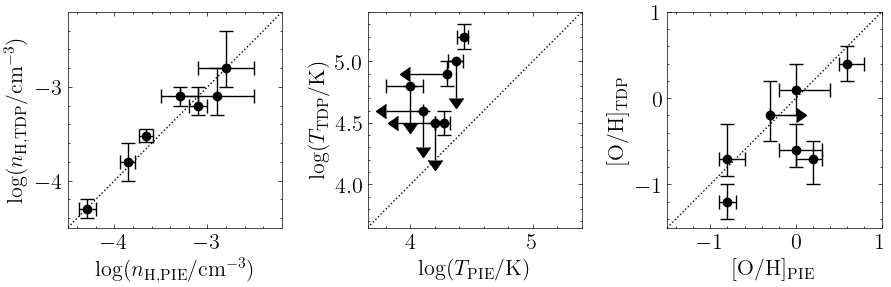

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(3.5*3, 2.8*1))

# n_H
# z=0.67

x = np.arange(-5,-2.0,0.1)
axes[0].plot(x,x,linestyle=':')

axes[0].errorbar(-2.8, -2.8, xerr=0.3, yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.85, -3.8, xerr=[[0.09],[0.07]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')


# z=1.09
axes[0].errorbar(-3.1, -3.2, xerr=0.1, yerr=[[0.1],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-3.66, -3.52, xerr=0.08, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.26
axes[0].errorbar(-3.3, -3.1, xerr=0.2, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.27
axes[0].errorbar(-2.9, -3.1, xerr=0.4, yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].errorbar(-4.29, -4.3, xerr=0.09, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[0].set_xlabel(r'$\log(n_\mathrm{H,PIE}/\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\log(n_\mathrm{H,TDP}/\mathrm{cm}^{-3})$')

axes[0].set_xlim(-4.5, -2.2)
axes[0].set_ylim(-4.5, -2.2)

# logT

# z=0.67
axes[1].errorbar(4.27, 4.5, xerr=[[0.07],[0.05]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(4.44, 5.2, xerr=[[0.06],[0.03]], yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.09
axes[1].errorbar(4.2, 4.5, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(4.3, 4.9, xerr=0.3, yerr=0.1, marker='o', xuplims=True, 
           linestyle='none', capsize=5, color='black')

# z=1.26
axes[1].errorbar(4.1, 4.6, xerr=0.3, yerr=0.3, marker='o', xuplims=True, uplims=True,
           linestyle='none', capsize=5, color='black')

# z=1.27
axes[1].errorbar(4.0, 4.8, xerr=[[0.2],[0.1]], yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='black')

axes[1].errorbar(4.37, 5.0, xerr=0.06, yerr=0.3, marker='o', uplims=True,
           linestyle='none', capsize=5, color='black')

t = np.arange(3.65,5.6,0.1)
axes[1].plot(t,t,linestyle=':')

axes[1].set_xlim(3.65,5.4)
axes[1].set_ylim(3.65,5.4)

axes[1].set_xlabel(r'$\log(T_\mathrm{PIE}/\mathrm{K})$')
axes[1].set_ylabel(r'$\log(T_\mathrm{TDP}/\mathrm{K})$')

# metals

x = np.arange(-3,1.2,0.1)
axes[2].plot(x,x,linestyle=':')

# z=0.67
axes[2].errorbar(-0.8, -1.2, xerr=0.1, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

axes[2].errorbar(-0.8, -0.7, xerr=[[0.1],[0.2]], yerr=[[0.2],[0.4]], marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.09
axes[2].errorbar(0.2, -0.7, xerr=[[0.2],[0.1]], yerr=[[0.3],[0.2]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[2].errorbar(-0.3, -0.2, xerr=0.3, yerr=[[0.3],[0.4]], marker='o', xlolims=True,
           linestyle='none', capsize=5, color='black')

# z=1.26
axes[2].errorbar(0.6, 0.4, xerr=[[0.1],[0.2]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='black')

# z=1.27
axes[2].errorbar(0.0, -0.6, xerr=[[0.2],[0.3]], yerr=[[0.2],[0.3]], marker='o',
           linestyle='none', capsize=5, color='black')

axes[2].errorbar(0.0, 0.1, xerr=[[0.2],[0.4]], yerr=0.3, marker='o',
           linestyle='none', capsize=5, color='black')

axes[2].set_xlabel(r'$\mathrm{[O/H]_{PIE}}$')
axes[2].set_ylabel(r'$\mathrm{[O/H]_{TDP}}$')

axes[2].set_xlim(-1.5, 1.0)
axes[2].set_ylim(-1.5, 1.0)


plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig(rootdir+'Figures/TDP_vs_PIE_meas_slides.pdf', dpi=300)
plt.savefig(rootdir+'Figures/TDP_vs_PIE_meas_slides.png', dpi=300)

## Plotting

<ErrorbarContainer object of 3 artists>

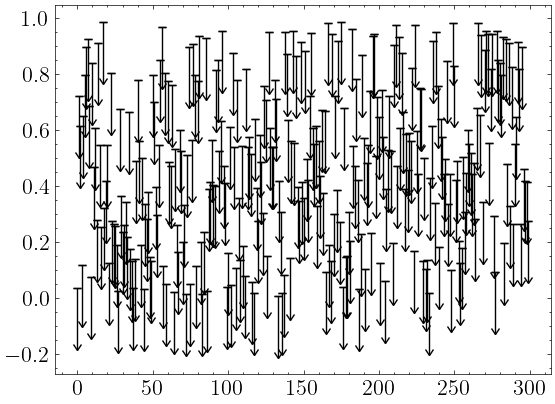

In [63]:
testdata = np.random.random(300)
fig, axs = plt.subplots()
plot, caps, bars = plt.errorbar(np.arange(300), testdata, xerr=None, yerr=0.2, uplims=True, fmt='_', capsize=3, elinewidth=0)
caps[0].set_fillstyle('none')

plt.errorbar(np.arange(300), testdata, xerr=None, yerr=[[0.22],[0.]], linestyle='None', capsize=0, color='black')


In [ ]:
def plot_str(ax, s_x, s_y, dx_lim, dy_lim, m, c, mfc, a, dp_x=.02, dp_y=.02):
    
    '''
    Function to plot string
    
    ax: axis
    s_x, s_y: string for x, y
    dx_lim, dy_lim: arrow width for upper limit in x, y
    m: marker type
    c: marker color
    mfc: marker face color (can be empty)
    a: transparency
    dp_x, dp_y: addition to dx or dy for upper limits to connect the spear
    '''
    
    x_lim = s_x[0]=='<'
    y_lim = s_y[0]=='<'
    
    # Handle x
    if not x_lim: # Detection
        s_x_split = s_x.split(',')
        x = float(s_x[0])
        dx_lo = -float(s_x[1]) # Take care of the negative sign
        dx_hi = float(s_x[2])
    else: # Upper limit
        x = float(s_x[1:])
        dx_lo = dx_lim
        dx_hi = dx_lim
        
    # Handle y
    if not y_lim:
        s_y_split = s_y.split(',')
        y = float(s_y[0])
        dy_lo = -float(s_y[1]) # Take care of the negative sign
        dy_hi = float(s_y[2])
    else:
        y = float(s_y[1:])
        dy_lo = dy_lim
        dy_hi = dy_lim
        
    # Plotting cases
    
    # Both detections
    if not x_lim and not y_lim:
        ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[dy_lo],[dy_hi]], marker='o',
                   linestyle='none', capsize=5, color=c, markerfacecolor=mfc, alpha=a)

    if not x_lim and y_lim:
        
        # Plot the marker and the spear
        plot, caps, bars = ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[dy_lo],[dy_hi]], marker='o', uplims=True,
                   linestyle='none', capsize=5, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)
        caps[0].set_fillstyle('none')
        
        # Now connect them
        ax.errorbar(x, y, xerr=None, yerr=[[dy_lo+dp_y],[0]], marker='o',
                   linestyle='none', capsize=0, color=c, alpha=a)


    if x_lim and not y_lim:
        
        # Plot the marker and the spear
        plot, caps, bars = ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[dy_lo],[dy_hi]], marker='o', xuplims=True,
                   linestyle='none', capsize=5, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)
        caps[0].set_fillstyle('none')
        
        # Now connect them
        ax.errorbar(x, y, xerr=[[dx_lo+dp_x],[0]], yerr=None, marker='o',
                   linestyle='none', capsize=0, color=c, alpha=a)
        
    if not x_lim and not y_lim:
        
        # Plot the marker and the spear
        plot, caps, bars = ax.errorbar(x, y, xerr=[[dx_lo],[dx_hi]], yerr=[[dy_lo],[dy_hi]], marker='o', xuplims=True, uplims=True,
                   linestyle='none', capsize=5, color=c, markerfacecolor=mfc, alpha=a, elinewidth=0)
        caps[0].set_fillstyle('none')
        
        # Now connect them
        ax.errorbar(x, y, xerr=[[dx_lo+dp_x],[0]], yerr=[[dy_lo+dp_y],[0]], marker='o',
                   linestyle='none', capsize=0, color=c, alpha=a)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_65452/256835103.py:219: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  axes[2].errorbar(-3.09, 4.7, xerr=[[0.06],[0.08]], yerr=0.2, marker='o', uplims=True,


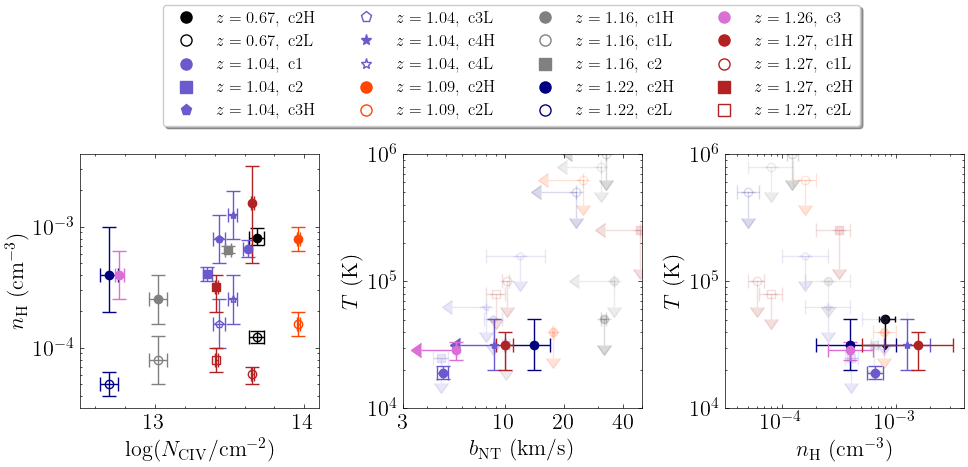

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(3.8*3, 3.3*1))

# N(CIV) vs. n_H
# z=0.67
# c2H
axes[0].errorbar(13.68, -3.09,  xerr=0.05, yerr=[[0.06],[0.08]], marker='o',
           linestyle='none', capsize=5, color='black')

# c2L
axes[0].errorbar(13.68, -3.91, xerr=0.05, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[0].errorbar(13.62, -3.18, xerr=0.03, yerr=0.07, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[0].errorbar(13.35, -3.39, xerr=0.03, yerr=0.06, marker='s',
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[0].errorbar(13.43, -3.1, xerr=0.04, yerr=0.2, marker='p',
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[0].errorbar(13.43, -3.8, xerr=0.04, yerr=0.2, marker='p',
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[0].errorbar(13.52, -2.9, xerr=0.03, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[0].errorbar(13.52, -3.6, xerr=0.03, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')


# z=1.09
# c2H
axes[0].errorbar(13.96, -3.1, xerr=0.01, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orangered')

# c2L
axes[0].errorbar(13.96, -3.8, xerr=0.01, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[0].errorbar(13.02, -3.6, xerr=0.06, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='grey')

# c1L
axes[0].errorbar(13.02, -4.1, xerr=0.06, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[0].errorbar(13.49, -3.19, xerr=0.02, yerr=0.03, marker='s',
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[0].errorbar(12.69, -3.4, xerr=0.06, yerr=[[0.3],[0.4]], marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[0].errorbar(12.69, -4.3, xerr=0.06, yerr=0.1, marker='o',
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26
axes[0].errorbar(12.76, -3.4, xerr=0.03, yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H
axes[0].errorbar(13.65, -2.8, xerr=0.01, yerr=[[0.5],[0.3]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L
axes[0].errorbar(13.65, -4.22, xerr=0.01, yerr=[[0.08],[0.06]], marker='o',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[0].errorbar(13.41, -3.5, xerr=0.01, yerr=[[0.2],[0.1]], marker='s',
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[0].errorbar(13.41, -4.1, xerr=0.01, yerr=0.1, marker='s',
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

axes[0].set_xlabel(r'$\log(N_\mathrm{CIV}/\mathrm{cm}^{-2})$')
axes[0].set_ylabel(r'$n_\mathrm{H} \ \mathrm{(cm^{-3})}$')

y = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[0].set_xlim(12.5, 14.1)
axes[0].set_ylim(-4.5, -2.4)

# T-b_NT

# n_H vs. logT
# z=0.67
# c2H
axes[1].errorbar(32, 4.7, xerr=1, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='black')

# c2L
axes[1].errorbar(33, 6.0, xerr=33/3, yerr=0.2, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[1].errorbar(4.8, 4.28, xerr=0.3, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[1].errorbar(4.7, 4.4, xerr=0.4, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[1].errorbar(8.7, 4.7, xerr=0.9, yerr=0.2, marker='p', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[1].errorbar(12, 5.2, xerr=12/3, yerr=0.2, marker='p', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[1].errorbar(8.8, 4.5, xerr=8.8/3, yerr=0.2, marker='*', xuplims=True,
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[1].errorbar(8.0, 4.8, xerr=8.0/3, yerr=0.2, marker='*', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')


# z=1.09
# c2H
axes[1].errorbar(17.6, 4.6, xerr=0.3, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='orangered')

# c2L
axes[1].errorbar(25, 5.8, xerr=25/3, yerr=0.2, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[1].errorbar(36, 5.0, xerr=36/3, yerr=0.2, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[1].errorbar(31, 5.9, xerr=31/3, yerr=0.2, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[1].errorbar(10.1, 4.5, xerr=0.4, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[1].errorbar(14, 4.5, xerr=[[4],[3]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[1].errorbar(23, 5.7, xerr=23/3, yerr=0.2, marker='o', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26
axes[1].errorbar(5.6, 4.46, xerr=5.6/3, yerr=[[0.08],[0.06]], marker='o', xuplims=True,
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H
axes[1].errorbar(10, 4.5, xerr=1, yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L
axes[1].errorbar(10.2, 5.0, xerr=[[0.6],[0.3]], yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[1].errorbar(49, 5.4, xerr=49/3, yerr=0.3, marker='s', xuplims=True, uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[1].errorbar(9, 4.9, xerr=1, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')


axes[1].set_xlabel(r'$b_\mathrm{NT} \ \mathrm{(km/s)}$')
axes[1].set_ylabel(r'$T \ (\mathrm{K})$')

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[1].set_yticks(np.log10(y), minor=True)
axes[1].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[1].set_xscale('log')

axes[1].set_ylim(4.,6.)

axes[1].set_xlim(3,50)
axes[1].set_xticks([3,10,20,40], labels=[r'$3$',r'$10$',r'$20$',r'$40$'])

plt.subplots_adjust(wspace=0.35, hspace=0.)

# n_H vs. T
# z=0.67
# c2H
axes[2].errorbar(-3.09, 4.7, xerr=[[0.06],[0.08]], yerr=0.2, marker='o', uplims=True, 
           capsize=2, color='black', fmt='_')

# c2L
axes[2].errorbar(-3.91, 6.0, xerr=0.05, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='black', markerfacecolor='none')


# z=1.04
# c1
axes[2].errorbar(-3.18, 4.28, xerr=0.07, yerr=0.05, marker='o',
           linestyle='none', capsize=5, color='slateblue')
# c2
axes[2].errorbar(-3.39, 4.4, xerr=0.06, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue')
# c3H
axes[2].errorbar(-3.1, 4.7, xerr=0.2, yerr=0.2, marker='p', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue')
# c3L
axes[2].errorbar(-3.8, 5.2, xerr=0.2, yerr=0.2, marker='p', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')

# c4H
axes[2].errorbar(-2.9, 4.5, xerr=0.2, yerr=0.2, marker='*',
           linestyle='none', capsize=5, color='slateblue')

# c4L
axes[2].errorbar(-3.6, 4.8, xerr=0.2, yerr=0.2, marker='*', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='slateblue', markerfacecolor='none')


# z=1.09
# c2H
axes[2].errorbar(-3.1, 4.6, xerr=0.1, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='orangered')

# c2L
axes[2].errorbar(-3.8, 5.8, xerr=0.1, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='orangered', markerfacecolor='none')

# z=1.16
# c1H
axes[2].errorbar(-3.6, 5.0, xerr=0.2, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey')

# c1L
axes[2].errorbar(-4.1, 5.9, xerr=0.2, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey', markerfacecolor='none')

# c2
axes[2].errorbar(-3.19, 4.5, xerr=0.03, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='grey')

# z=1.22

# c2H
axes[2].errorbar(-3.4, 4.5, xerr=[[0.3],[0.4]], yerr=0.2, marker='o',
           linestyle='none', capsize=5, color='navy')

# c2L
axes[2].errorbar(-4.3, 5.7, xerr=0.1, yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='navy', markerfacecolor='none')

# z=1.26
axes[2].errorbar(-3.4, 4.46, xerr=0.2, yerr=[[0.08],[0.06]], marker='o',
           linestyle='none', capsize=5, color='orchid')

# z=1.27
# c1H
axes[2].errorbar(-2.8, 4.5, xerr=[[0.5],[0.3]], yerr=[[0.2],[0.1]], marker='o',
           linestyle='none', capsize=5, color='firebrick')

# c1L
axes[2].errorbar(-4.22, 5.0, xerr=[[0.08],[0.06]], yerr=0.2, marker='o', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')

# c2H
axes[2].errorbar(-3.5, 5.4, xerr=[[0.2],[0.1]], yerr=0.3, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick')

# c2L
axes[2].errorbar(-4.1, 4.9, xerr=0.1, yerr=0.2, marker='s', uplims=True, alpha=.15,
           linestyle='none', capsize=5, color='firebrick', markerfacecolor='none')


axes[2].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[2].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[2].set_xticks(np.log10(x), minor=True)
axes[2].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[2].set_yticks(np.log10(y), minor=True)
axes[2].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[2].set_xlim(-4.5, -2.4)
axes[2].set_ylim(4.,6.)

# Specify handles ONLY for this plot

handles = []
z_list = [r'$z=0.67,\ \mathrm{c2H}$', r'$z=0.67,\ \mathrm{c2L}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3H}$', r'$z=1.04,\ \mathrm{c3L}$',
          r'$z=1.04,\ \mathrm{c4H}$', r'$z=1.04,\ \mathrm{c4L}$',
          r'$z=1.09,\ \mathrm{c2H}$', r'$z=1.09,\ \mathrm{c2L}$',
          r'$z=1.16,\ \mathrm{c1H}$', r'$z=1.16,\ \mathrm{c1L}$',
          r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c2H}$', r'$z=1.22,\ \mathrm{c2L}$',
          r'$z=1.26,\ \mathrm{c3}$',
          r'$z=1.27,\ \mathrm{c1H}$', r'$z=1.27,\ \mathrm{c1L}$',
          r'$z=1.27,\ \mathrm{c2H}$', r'$z=1.27,\ \mathrm{c2L}$'
         ]

colors_list = ['black', 'black',
                 'slateblue', 'slateblue','slateblue','slateblue','slateblue','slateblue',
                 'orangered', 'orangered', 'grey', 'grey','grey',
                 'navy','navy', 'orchid',
                 'firebrick', 'firebrick', 'firebrick','firebrick']

markers_list = ['o', 'o', 'o', 's', 'p', 'p', '*', '*', 'o', 'o', 'o', 'o', 's', 'o', 'o', 'o', 'o' ,'o', 's', 's']

fc_list = ['black', 'none',
                 'slateblue', 'slateblue','slateblue', 'none', 'slateblue', 'none',
                 'orangered', 'none', 'grey', 'none', 'grey',
                 'navy', 'none', 'orchid',
                 'firebrick', 'none', 'firebrick', 'none']

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(0.6, 1.35),
          fancybox=True, shadow=True, ncol=4)

#plt.savefig(rootdir+'Figures/CIV_multiphase.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_multiphase.png', dpi=300)

Alternate colorstyle

In [27]:
colors_list = ['goldenrod', 'goldenrod',
                 'mediumblue', 'mediumblue','mediumblue','mediumblue','mediumblue','mediumblue',
                 'firebrick', 'firebrick', 'orchid', 'orchid','orchid',
                 'yellowgreen','yellowgreen', 'green',
                 'mediumturquoise', 'mediumturquoise', 'mediumturquoise','mediumturquoise']

markers_list = ['o', 'o', 'o', 's', 'p', 'p', '*', '*', 'o', 'o', 'o', 'o', 's', 'o', 'o', 'o', 'o' ,'o', 's', 's']

fc_list = ['goldenrod', 'none',
                 'mediumblue', 'mediumblue','mediumblue', 'none', 'mediumblue', 'none',
                 'firebrick', 'none', 'orchid', 'none', 'orchid',
                 'yellowgreen', 'none', 'green',
                 'mediumturquoise', 'none', 'mediumturquoise', 'none']

In [28]:
z_list = [r'$z=0.67,\ \mathrm{c2H}$', r'$z=0.67,\ \mathrm{c2L}$',
          r'$z=1.04,\ \mathrm{c1}$', r'$z=1.04,\ \mathrm{c2}$',
          r'$z=1.04,\ \mathrm{c3H}$', r'$z=1.04,\ \mathrm{c3L}$',
          r'$z=1.04,\ \mathrm{c4H}$', r'$z=1.04,\ \mathrm{c4L}$',
          r'$z=1.09,\ \mathrm{c2H}$', r'$z=1.09,\ \mathrm{c2L}$',
          r'$z=1.16,\ \mathrm{c1H}$', r'$z=1.16,\ \mathrm{c1L}$',
          r'$z=1.16,\ \mathrm{c2}$',
          r'$z=1.22,\ \mathrm{c2H}$', r'$z=1.22,\ \mathrm{c2L}$',
          r'$z=1.26,\ \mathrm{c3}$',
          r'$z=1.27,\ \mathrm{c1H}$', r'$z=1.27,\ \mathrm{c1L}$',
          r'$z=1.27,\ \mathrm{c2H}$', r'$z=1.27,\ \mathrm{c2L}$'
         ]

## Multiphase gas

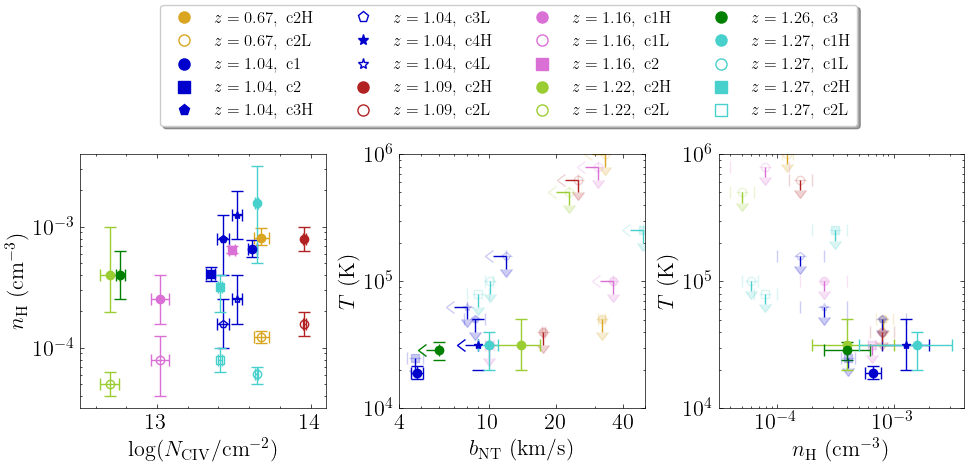

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(3.8*3, 3.3*1))

for i in range(len(logN_CIV_arr)):
    plot_str(axes[0], logN_CIV_arr[i], log_hdens_arr[i], .1, .1, markers_list[i], colors_list[i], fc_list[i], 1, 1, 1)

axes[0].set_xlabel(r'$\log(N_\mathrm{CIV}/\mathrm{cm}^{-2})$')
axes[0].set_ylabel(r'$n_\mathrm{H} \ \mathrm{(cm^{-3})}$')

y = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[0].set_xlim(12.5, 14.1)
axes[0].set_ylim(-4.5, -2.4)
    
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        a=.2
    else:
        a=1
    
    if b_NT_arr[i][0]=='<':
        plot_str(axes[1], b_NT_arr[i], logT_arr[i], float(b_NT_arr[i][1:])/8, .1, markers_list[i], colors_list[i], fc_list[i], a, 1, 1)  
    else:
        plot_str(axes[1], b_NT_arr[i], logT_arr[i], .1, .1, markers_list[i], colors_list[i], fc_list[i], a, 1, 1)  
            
axes[1].set_xscale('log')

axes[1].set_xlabel(r'$b_\mathrm{NT} \ \mathrm{(km/s)}$')
axes[1].set_ylabel(r'$T \ (\mathrm{K})$')

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[1].set_yticks(np.log10(y), minor=True)
axes[1].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[1].set_xscale('log')

axes[1].set_ylim(4.,6.)

axes[1].set_xlim(4,50)
axes[1].set_xticks([4,10,20,40], labels=[r'$4$',r'$10$',r'$20$',r'$40$'])

for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        a=.2
    else:
        a=1
    
    plot_str(axes[2], log_hdens_arr[i], logT_arr[i], .1, .08, markers_list[i], colors_list[i], fc_list[i], a, 1, 1)
    
axes[2].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[2].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[2].set_xticks(np.log10(x), minor=True)
axes[2].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[2].set_yticks(np.log10(y), minor=True)
axes[2].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[2].set_xlim(-4.5, -2.4)
axes[2].set_ylim(4.,6.)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

handles = []

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=colors_list[i], marker=markers_list[i],
                  markerfacecolor = fc_list[i],
                  linestyle='None', markersize=8, label=z_list[i]))
    
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(0.6, 1.35),
          fancybox=True, shadow=True, ncol=4)

#plt.savefig(rootdir+'Figures/CIV_multiphase.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_multiphase.png', dpi=300)

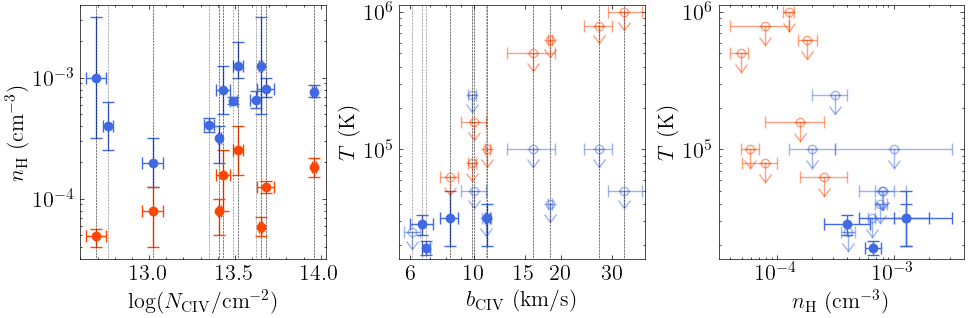

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(3.8*3, 3.3*1))

# N(CIV) vs. hdens
for i in range(len(logN_CIV_arr)):
    plot_str(axes[0], logN_CIV_arr[i], log_hdens_arr[i], .1, .1, 'o', colors_list[i], colors_list[i], 1, 1, 1)
    axes[0].axvline(float(logN_CIV_arr[i].split(',')[0]), linestyle=':', lw=.4)
    
axes[0].set_xlabel(r'$\log(N_\mathrm{CIV}/\mathrm{cm}^{-2})$')
axes[0].set_ylabel(r'$n_\mathrm{H} \ \mathrm{(cm^{-3})}$')

y = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[0].set_xlim(12.6, 14.03)
axes[0].set_ylim(-4.5, -2.4)
 
# b(CIV) vs. T
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
     
    plot_str(axes[1], b_CIV_arr[i], logT_arr[i], .1, .07, 'o', colors_list[i], fc, a, 1, 1.8)  
    axes[1].axvline(float(b_CIV_arr[i].split(',')[0]), linestyle=':', lw=.4)
    
axes[1].set_xlabel(r'$b_\mathrm{CIV} \ \mathrm{(km/s)}$')
axes[1].set_ylabel(r'$T \ (\mathrm{K})$')

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)

axes[1].set_xscale('log')        
axes[1].set_xticks([6,10,15,20,30], labels=[r'$6$', r'$10$', r'$15$', r'$20$', r'$30$'])
axes[1].set_xlim(5.5,39)
axes[1].set_yticks(np.log10(y), minor=True)
axes[1].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[1].set_ylim(4.2,6.05)

# hdens vs. T
for i in range(len(logT_arr)):
    
    if logT_arr[i][0]=='<':
        fc='none'
        a=.5
    else:
        fc=colors_list[i]
        a=1
    
    plot_str(axes[2], log_hdens_arr[i], logT_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1, 1.8)
    
axes[2].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[2].set_ylabel(r'$T \ (\mathrm{K})$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[2].set_xticks(np.log10(x), minor=True)
axes[2].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e4, 1e5, 1e6]:
    for j in range(1,10):
        y.append(i*j)
        
axes[2].set_yticks(np.log10(y), minor=True)
axes[2].set_yticks([4,5,6], labels=[r'$10^4$', r'$10^5$', r'$10^6$'])

axes[2].set_xlim(-4.5, -2.4)
axes[2].set_ylim(4.2,6.05)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_multiphase.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_multiphase.png', dpi=300)

Panel plot (this work only)

NameError: name 'N_O_arr' is not defined

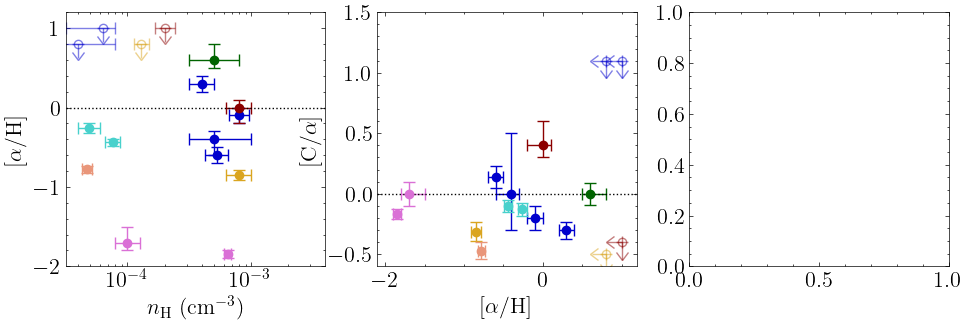

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(3.8*3, 3.3*1))

# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axes[0], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

axes[0].axhline(0, linestyle=':')
axes[0].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\mathrm{[\alpha/H]}$')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[0].set_xticks(np.log10(x), minor=True)
axes[0].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[0].set_xlim(-4.5, -2.4)
axes[0].set_ylim(-2.,1.2)

# metals vs. C/O
for i in range(len(log_metals_arr)):
    if C_O_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    
    plot_str(axes[1], log_metals_arr[i], C_O_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1.8, 1.8)
    
axes[1].axhline(0, linestyle=':')

axes[1].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axes[1].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axes[1].set_xlim(-2.1,1.2)
axes[1].set_ylim(-0.6, 1.5)

# metals vs. N/O
for i in range(len(log_metals_arr)):
    
    if N_O_arr[i]=='':
        continue
    else:
        if N_O_arr[i][0]=='<':
            fc = 'none'
            a=.5
        else:
            fc = colors_list[i]
            a=1

        plot_str(axes[2], log_metals_arr[i], N_O_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1.8, 1.8)

axes[2].axhline(0, linestyle=':')

axes[2].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axes[2].set_ylabel(r'$\mathrm{[N/\alpha]}$')

axes[2].set_xlim(-1.9,1.2)
axes[2].set_ylim(-0.75, 1.7)

plt.subplots_adjust(wspace=0.4, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

C/O vs. O/H (with previous work)

In [71]:
from matplotlib.lines import Line2D

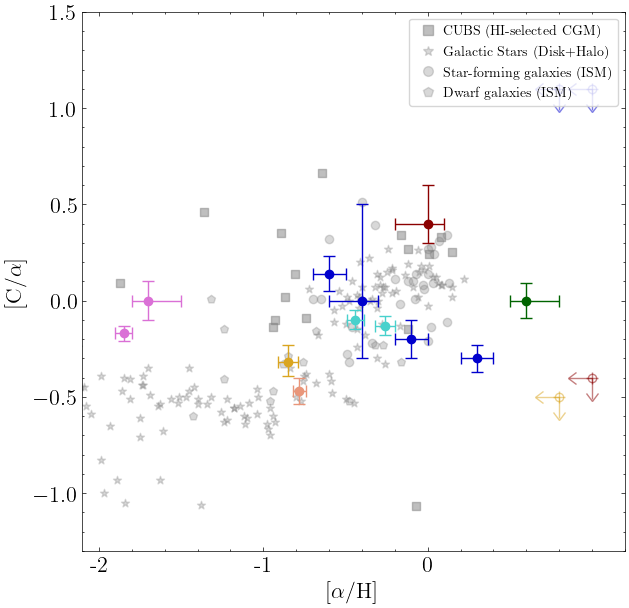

In [72]:
fig, ax = plt.subplots(1, figsize=(7,7))

# metals vs. C/O
for i in range(len(log_metals_arr)):
    if C_O_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    
    plot_str(ax, log_metals_arr[i], C_O_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1.4, 1.4)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if C_O_CUBS[i]!='':
        if log_metals_CUBS[i][0]=='>' or log_metals_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
                pass
                #fc = 'none'
                #a=.5
        #plot_str(ax, log_metals_CUBS[i], C_O_CUBS[i], .1, .08, 's', 'grey', fc, a, 1.4, 1.4)
            
        else:
            fc = 'grey'
            a=.5
            ax.scatter(float(log_metals_CUBS[i].split(',')[0]), float(C_O_CUBS[i].split(',')[0]), marker='s', color='grey', alpha=.5)

    
# Stars
ax.scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
ax.scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
ax.scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
ax.scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)


handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CUBS (HI-selected CGM)', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars (Disk+Halo)', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies (ISM)', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies (ISM)', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)


# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
plt.legend(handles=handles, fontsize=10, loc='upper right', ncol=1, columnspacing=0.1, handletextpad=0.06)

#ax.axhline(0, linestyle=':')

ax.set_xlabel(r'$\mathrm{[\alpha/H]}$')
ax.set_ylabel(r'$\mathrm{[C/\alpha]}$')

ax.set_xlim(-2.1,1.2)
ax.set_ylim(-1.3, 1.5)

ax.set_xticks([-2,-1,0], [-2,-1,0])

plt.subplots_adjust(wspace=0.4, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

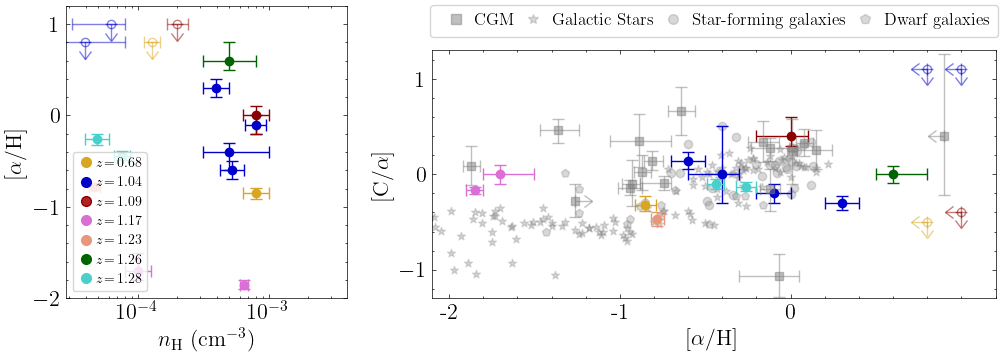

In [73]:
fig, axd = plt.subplot_mosaic([['left','upper right'],
                               ['left','lower right']],
                               figsize=(12,3.8), gridspec_kw={'height_ratios': [1,40], 'width_ratios': [1,2]})


# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axd['left'], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
axd['left'].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axd['left'].set_ylabel(r'$\mathrm{[\alpha/H]}$')

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='')
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='')
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='darkred', markerfacecolor='firebrick', linestyle='')
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='')
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='')
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='')
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='')

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
axd['left'].legend(handles=handles, fontsize=10, loc='lower left', ncol=1, columnspacing=0.1, 
               handlelength=1.2, handletextpad=0.06)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axd['left'].set_xticks(np.log10(x), minor=True)
axd['left'].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axd['left'].set_xlim(-4.55, -2.4)
axd['left'].set_ylim(-2.,1.2)

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if C_O_arr[i][0]=='<':
        fc = 'none'
        a=.5
        if float(C_O_arr[i][1:])<1.3:
            plot_str(axd['lower right'], log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)
    else:
        fc = colors_list[i]
        a=1
        plot_str(axd['lower right'], log_metals_arr[i], C_O_arr[i], .05, .08, 'o', colors_list[i], fc, a, 1.9, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if C_O_CUBS[i]!='':
        if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            fc = 'none'
            a=.5
        else:
            fc = 'grey'
            a=.5
            plot_str(axd['lower right'], log_metals_CUBS[i], C_O_CUBS[i], .05, .08, 's', 'grey', fc, a, 1.9, 1.9)
    
# Stars
axd['lower right'].scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
axd['lower right'].scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
axd['lower right'].scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
axd['lower right'].scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)

axd['lower right'].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axd['lower right'].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axd['lower right'].set_xlim(-2.1,1.2)
axd['lower right'].set_ylim(-1.3, 1.3)

axd['lower right'].set_xticks([-2,-1,0], [-2,-1,0])

axd['upper right'].spines['top'].set_visible(False)
axd['upper right'].spines['right'].set_visible(False)
axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].spines['left'].set_visible(False)
axd['upper right'].get_xaxis().set_ticks([])
axd['upper right'].get_yaxis().set_ticks([])

handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)

# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
axd['upper right'].legend(handles=handles, fontsize=12.25, loc='upper right', ncol=4, 
               columnspacing=0.1, handletextpad=0.1, bbox_to_anchor=(1.02, 2.5),borderpad=.5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)

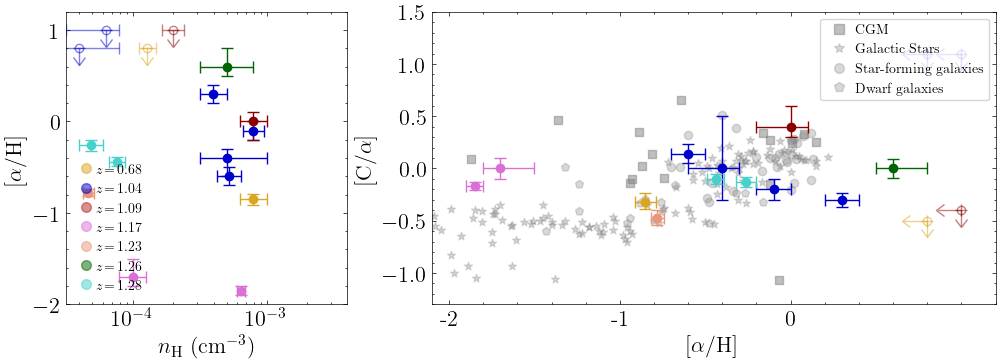

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12,3.8), gridspec_kw={'width_ratios': [1, 2]})

# hdens vs. metals
for i in range(len(log_hdens_arr)):
    if log_metals_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axes[0], log_hdens_arr[i], log_metals_arr[i], .1, .1, 'o', colors_list[i], fc, a, 1, 1.8)

#axes[0].axhline(0, linestyle=':')
axes[0].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$\mathrm{[\alpha/H]}$')

p1 = Line2D([0], [0], label='$z\!=\!0.68$', marker='o', markersize=7, 
         markeredgecolor='goldenrod', markerfacecolor='goldenrod', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='$z\!=\!1.04$', marker='o', markersize=7, 
         markeredgecolor='mediumblue', markerfacecolor='mediumblue', linestyle='', alpha=.5)
p3 = Line2D([0], [0], label='$z\!=\!1.09$', marker='o', markersize=7, 
         markeredgecolor='firebrick', markerfacecolor='firebrick', linestyle='', alpha=.5)
p4 = Line2D([0], [0], label='$z\!=\!1.17$', marker='o', markersize=7, 
         markeredgecolor='orchid', markerfacecolor='orchid', linestyle='', alpha=.5)
p5 = Line2D([0], [0], label='$z\!=\!1.23$', marker='o', markersize=7, 
         markeredgecolor='darksalmon', markerfacecolor='darksalmon', linestyle='', alpha=.5)
p6 = Line2D([0], [0], label='$z\!=\!1.26$', marker='o', markersize=7, 
         markeredgecolor='darkgreen', markerfacecolor='darkgreen', linestyle='', alpha=.5)
p7 = Line2D([0], [0], label='$z\!=\!1.28$', marker='o', markersize=7, 
         markeredgecolor='mediumturquoise', markerfacecolor='mediumturquoise', linestyle='', alpha=.5)

# add manual symbols to auto legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([p1,p2,p3,p4,p5,p6,p7])
axes[0].legend(handles=handles, fontsize=10, loc='lower left', ncol=1, columnspacing=0.1, 
               handlelength=1.2, frameon=False, handletextpad=0.06)

#leg1 = axes[0].legend(handles=handles, fontsize=10, loc='upper right', ncol=1, columnspacing=0.1, handletextpad=0.06)
#axes[0].add_artist(leg1)

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)
        
axes[0].set_xticks(np.log10(x), minor=True)
axes[0].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

axes[0].set_xlim(-4.5, -2.4)
axes[0].set_ylim(-2.,1.2)

# metals vs. C/O

for i in range(len(log_metals_arr)):
    if C_O_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    
    plot_str(axes[1], log_metals_arr[i], C_O_arr[i], .1, .08, 'o', colors_list[i], fc, a, 1.4, 1.9)

# CUBS points
for i in range(len(log_metals_CUBS)):
    if C_O_CUBS[i]!='':
        if log_metals_CUBS[i][0]=='>' or log_metals_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
            if C_O_CUBS[i][0]=='<' or C_O_CUBS[i][0]=='>':
                pass
                #fc = 'none'
                #a=.5
        #plot_str(ax, log_metals_CUBS[i], C_O_CUBS[i], .1, .08, 's', 'grey', fc, a, 1.4, 1.4)
            
        else:
            fc = 'grey'
            a=.5
            axes[1].scatter(float(log_metals_CUBS[i].split(',')[0]), float(C_O_CUBS[i].split(',')[0]), marker='s', color='grey', alpha=.5)

    
# Stars
axes[1].scatter(np.float_(disk_arr[:,2]), np.float_(disk_arr[:,1])-np.float_(disk_arr[:,2]), color='grey', marker='*', alpha=.3)
axes[1].scatter(np.float_(halo_arr[:,1]), np.float_(halo_arr[:,2]), color='grey', marker='*', alpha=.3)

# SF galaxies
axes[1].scatter(np.float_(sf_arr[:,0])-8.69, (np.float_(sf_arr[:,2])-8.39)-(np.float_(sf_arr[:,0])-8.69), 
           color='grey', marker='o', alpha=.3)
# Dwarf galaxies
axes[1].scatter(np.float_(dwarf_arr[:,0])-8.69, np.float_(dwarf_arr[:,2])+0.3, color='grey', marker='p', alpha=.3)


handles, labels = plt.gca().get_legend_handles_labels()
p1 = Line2D([0], [0], label='CGM', marker='s', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.5)
p2 = Line2D([0], [0], label='Galactic Stars', marker='*', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p3 = Line2D([0], [0], label='Star-forming galaxies', marker='o', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)
p4 = Line2D([0], [0], label='Dwarf galaxies', marker='p', markersize=7, 
         markeredgecolor='grey', markerfacecolor='grey', linestyle='', alpha=.3)


# add manual symbols to auto legend
handles.extend([p1,p2,p3,p4])
axes[1].legend(handles=handles, fontsize=10, loc='upper right', ncol=1, 
               columnspacing=0.1, handletextpad=0.1)

#ax.axhline(0, linestyle=':')

axes[1].set_xlabel(r'$\mathrm{[\alpha/H]}$')
axes[1].set_ylabel(r'$\mathrm{[C/\alpha]}$')

axes[1].set_xlim(-2.1,1.2)
axes[1].set_ylim(-1.3, 1.5)

axes[1].set_xticks([-2,-1,0], [-2,-1,0])

plt.subplots_adjust(wspace=0.2, hspace=0.3)

#plt.savefig(rootdir+'Figures/CIV_enrichment.pdf', dpi=300)
#plt.savefig(rootdir+'Figures/CIV_enrichment.png', dpi=300)

## Cloud sizes

In [21]:
b_HI_arr = ['36, -1, +2',
            '36, -1, +2',
            '19, -1, +1',
            '19, -1, +1',
            '10, -2, +2',
            '14, -2, +4',
            '14, -2, +4',
            '21, -4, +5',
            '21, -3, +2',
            '21, -3, +2',
            '32, -3, +3',
            '19, -3, +2',
            '26, -4, +5',
            '22, -2, +2',
            '25, -2, +2',
            '33, -5, +10',]

logl_arr = ['0.6, -0.2, +0.2',
            '<2.1',
            '-0.3, -0.2, +0.2',
            '<2.5',
            '-0.7, -0.2, +0.2',
            '-0.2, -0.7, +0.5',
            '<2.5',
            '-0.1, -0.2, +0.2',
            '-0.7, -0.2, +0.1',
            '<0.9',
            '1.7, -0.3, +0.3',
            '1.51, -0.07, +0.07',
            '1.7, -0.1, +0.1',
            '-1.8, -0.3, +0.2',
            '1.7, -0.2, +0.2',
            '1.1, -0.1, +0.1']

In [22]:
colors_list = ['royalblue', # z=0.67, c2H
               'orangered', # z=0.67, c2L
               'royalblue', # z=1.04, c1H
               'orangered', # z=1.04, c1L
               'royalblue', # z=1.04, c2
               'royalblue', # z=1.04, c3H
               'orangered', # z=1.04, c3L
               'royalblue', # z=1.04, c4 
               'royalblue', # z=1.09, c1H 
               'orangered', # z=1.09, c1L 
               'royalblue', # z=1.16, c1 
               'royalblue', # z=1.16, c2 
               'royalblue', # z=1.22, c2
               'royalblue', # z=1.26, c3
               'royalblue', # z=1.27, c1
               'royalblue', # z=1.27, c2
              ]

In [23]:
log_hdens_plot_arr = np.arange(-5, -1.9, 0.1)

log_lJ_arr = np.log10(40*(10**log_hdens_plot_arr/1e-3)**-0.5)
log_lS_arr = np.log10(0.03*(10**log_hdens_plot_arr/1e-3)**-1)

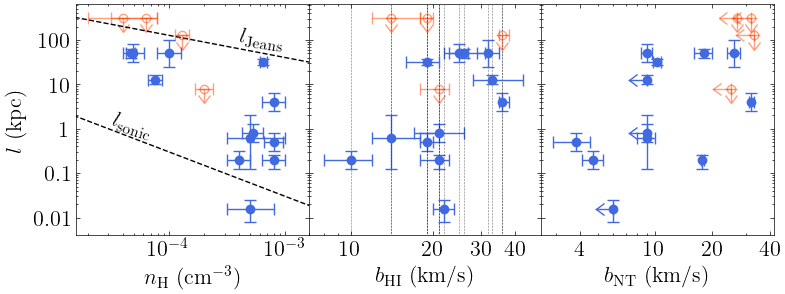

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(3*3., 3*1), sharey=True)

# hdens vs. l
for i in range(len(log_hdens_arr)):
    if logl_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    plot_str(axes[0], log_hdens_arr[i], logl_arr[i], .1, .15, 'o', colors_list[i], fc, a, 1, 2)

axes[0].plot(log_hdens_plot_arr, log_lJ_arr, color='black', linestyle='--')
axes[0].plot(log_hdens_plot_arr, log_lS_arr, color='black', linestyle='--')

x = []

for i in [1e-5, 1e-4, 1e-3, 1e-2]:
    for j in range(1,10):
        x.append(i*j)

axes[0].set_xticks(np.log10(x), minor=True)
axes[0].set_xticks([-4,-3,-2], labels=[r'$10^{-4}$', r'$10^{-3}$', r'$0.01$'])

y = []

for i in [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
    for j in range(1,10):
        y.append(i*j)
        
axes[0].set_yticks(np.log10(y), minor=True)
axes[0].set_yticks([-2,-1,0,1,2], labels=[r'$0.01$', r'$0.1$', r'$1$', r'$10$', r'$100$'])

axes[0].set_xlabel(r'$n_\mathrm{H} \ (\mathrm{cm}^{-3})$')
axes[0].set_ylabel(r'$l \ (\mathrm{kpc})$')

axes[0].text(-3.4,1.8,r'$l_\mathrm{Jeans}$', rotation=-8)
axes[0].text(-4.5,-0.2,r'$l_\mathrm{sonic}$', rotation=-18)

axes[0].set_xlim(-4.8, -2.8)
axes[0].set_ylim(-2.6,2.2)

# b(HI) vs. l
for i in range(len(b_HI_arr)):
    if logl_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
    axes[1].axvline(float(b_HI_arr[i].split(',')[0]), linestyle=':', lw=.4)
    plot_str(axes[1], b_HI_arr[i], logl_arr[i], .1, .15, 'o', colors_list[i], fc, a, 1, 2)
    
axes[1].set_xlabel(r'$b_\mathrm{HI} \ (\mathrm{km/s})$')
axes[1].set_xscale('log')
axes[1].set_xlim(7,50)
axes[1].set_xticks([10,20,30,40], labels=[r'$10$',r'$20$',r'$30$',r'$40$'])

# b_NT vs. l
for i in range(len(b_NT_arr)):
    if logl_arr[i][0]=='<':
        fc = 'none'
        a=.5
    else:
        fc = colors_list[i]
        a=1
                
    if b_NT_arr[i][0]!='<':
        plot_str(axes[2], b_NT_arr[i], logl_arr[i], .1, .15, 'o', colors_list[i], fc, a, 1, 2)
    else:
        plot_str(axes[2], b_NT_arr[i], logl_arr[i], float(b_NT_arr[i][1:])/9, .15, 'o', colors_list[i], fc, a, 1.8, 2)
    
axes[2].set_xlabel(r'$b_\mathrm{NT} \ (\mathrm{km/s})$')
axes[2].set_xscale('log')

axes[2].set_xlim(2.5,42)
axes[2].set_xticks([4,10,20,40], labels=[r'$4$',r'$10$',r'$20$',r'$40$'])

axes[2].set_yticks(np.log10(y), minor=True)
axes[2].set_yticks([-2,-1,0,1,2], labels=[r'$0.01$', r'$0.1$', r'$1$', r'$10$', r'$100$'])
axes[2].set_ylim(-2.4,2.8)

plt.subplots_adjust(wspace=0., hspace=0.)

plt.savefig(rootdir+'Figures/cloud_sizes.pdf', dpi=300)
plt.savefig(rootdir+'Figures/cloud_sizes.png', dpi=300)